# **Collect Data**

In [1]:
# Acceder a google drive
from google.colab import drive
drive.mount('/content/drive')

ubicacion_drive = '/content/drive/MyDrive/6672_Business Predictive Analytics_TF_Grupo 5/FuentesDatos'
#ubicacion_drive = '/content/drive/MyDrive/Trabajo Parcial Business/FuentesDatos'

Mounted at /content/drive


In [2]:
# Cargamos la librería pandas
import pandas as pd

## **Read Data**

In [3]:
df_heavy = pd.read_csv(f'{ubicacion_drive}/heavy_user.csv')

In [4]:
# Visualizar los 3 primeros registros
df_heavy.head(3)

,Unnamed: 0,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0


In [5]:
# Guardamos el dataset en un archivo .pickle
# df_heavy.to_pickle(f'{ubicacion_drive}/df_heavy_procesado.pickle')
df_heavy.to_pickle(f'{ubicacion_drive}/df_heavy_procesado.pickle')

# **Quality Cleaning**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Leemos el df procesado
df_heavy = pd.read_pickle(f'{ubicacion_drive}/df_heavy_procesado.pickle')

In [8]:
df_heavy.head(3)

,Unnamed: 0,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0


## **Overview Data**

In [9]:
# Visualización general de los datos
df_heavy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        43800 non-null  object 
 1   SOC               43800 non-null  float64
 2   SOH               43800 non-null  float64
 3   Charging_Cycles   43800 non-null  int64  
 4   Battery_Temp      43800 non-null  float64
 5   Motor_RPM         43800 non-null  float64
 6   Motor_Torque      43800 non-null  float64
 7   Motor_Temp        43800 non-null  float64
 8   Brake_Pad_Wear    43800 non-null  float64
 9   Charging_Voltage  43800 non-null  int64  
 10  Tire_Pressure     43800 non-null  float64
 11  DTC               43800 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
# Visualización general de las variables númericas
df_heavy.describe()

,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.0,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,400.0,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,0.0,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,400.0,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,400.0,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,400.0,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,400.0,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,400.0,34.987175


In [11]:
# Correción de las cabeceras
columnas_renombrar = {'Unnamed: 0': 'timestamp',
                      'Charging_Cycles': 'charging_cycles',
                      'Battery_Temp': 'battery_temp',
                      'Motor_RPM': 'motor_rpm',
                      'Motor_Torque': 'motor_torque',
                      'Motor_Temp': 'motor_temp',
                      'Brake_Pad_Wear': 'brake_pad_wear',
                      'Charging_Voltage': 'charging_voltage',
                      'Tire_Pressure': 'tire_pressure',
                      }
df_heavy = df_heavy.rename(columns=columnas_renombrar)

In [12]:
df_heavy.head(3)

,timestamp,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,charging_voltage,tire_pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0


## **Data Type Mismatch**

In [13]:
# Casteo de los tipos de datos de las columnas
print(f'Tipos de datos de las columnas antes de castear: \n{df_heavy.dtypes}')

df_heavy['timestamp'] = pd.to_datetime(df_heavy['timestamp'], errors='coerce')
df_heavy['DTC'] = df_heavy['DTC'].astype('category')

print(f'\nTipos de datos de las columnas después de castear: \n{df_heavy.dtypes}')

Tipos de datos de las columnas antes de castear: 
timestamp            object
SOC                 float64
SOH                 float64
charging_cycles       int64
battery_temp        float64
motor_rpm           float64
motor_torque        float64
motor_temp          float64
brake_pad_wear      float64
charging_voltage      int64
tire_pressure       float64
DTC                  object
dtype: object

Tipos de datos de las columnas después de castear: 
timestamp           datetime64[ns]
SOC                        float64
SOH                        float64
charging_cycles              int64
battery_temp               float64
motor_rpm                  float64
motor_torque               float64
motor_temp                 float64
brake_pad_wear             float64
charging_voltage             int64
tire_pressure              float64
DTC                       category
dtype: object


## **Uniform Data**

In [14]:
# Verificamos si existen duplicados
df_heavy.duplicated().sum()

np.int64(0)

In [15]:
# Verificar si existen datos unicos
df_heavy.nunique().sort_values(ascending=True)

,0
charging_voltage,1
DTC,9
charging_cycles,193
SOC,17714
motor_torque,18247
motor_rpm,18247
brake_pad_wear,18248
SOH,43800
motor_temp,43800
battery_temp,43800


**Observaciones:** Vemos que la columna **charging_voltage** es de un único valor, por lo que no nos aporta valor en el análisis. Y lo mismo con la columna **timestamp**, porque el modelo mirará el "estado" del vehículo en un momento, y decide si falla o no, por lo tanto no es una feature directa

In [16]:
print(f'Tamaño del dataset antes de eliminar la columna charging_voltage y timestamp: {df_heavy.shape}')
df_heavy = df_heavy.drop(columns=['charging_voltage', 'timestamp'])
print(f'Tamaño del dataset después de eliminar la columna charging_voltage y timestamp: {df_heavy.shape}')

Tamaño del dataset antes de eliminar la columna charging_voltage y timestamp: (43800, 12)
Tamaño del dataset después de eliminar la columna charging_voltage y timestamp: (43800, 10)


## **Missing Values**

In [17]:
# Verificamos los valores nulos
df_heavy.isna().sum()

,0
SOC,0
SOH,0
charging_cycles,0
battery_temp,0
motor_rpm,0
motor_torque,0
motor_temp,0
brake_pad_wear,0
tire_pressure,0
DTC,0


**Observaciones:** Vemos que no existen nulos, por lo tanto no se eliminan

## **Outliers**

In [18]:
# Creamos dos subdatasets para las variables categoricas y númericas
df_heavy_cat = df_heavy.select_dtypes(include=['category'])
df_heavy_num = df_heavy.select_dtypes(include=['number'])

In [19]:
df_heavy_num.head(3)

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
0,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,34.987175
1,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,34.976006
2,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,34.961510


In [20]:
df_heavy_cat.head(3)

,DTC
0,0
1,0
2,0


### **Análisis de columnas categorícas**

In [21]:
# Verificar la cantidad de códigos DTC que no presentaron fallas
df_heavy_cat[df_heavy_cat['DTC'] == '0'].value_counts().sum()

np.int64(42594)

In [22]:
# Verificar la cantidad de códigos DTC que presentaron fallas
df_heavy_cat[df_heavy_cat['DTC'] != '0'].value_counts().sum()

np.int64(1206)

In [23]:
# Gráficar por cada tipo de Códigos DTC
def graficar_codigos_dtc(df_heavy_cat):
  ax = df_heavy_cat['DTC'].value_counts().plot(kind='bar')
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Códigos DTC")
  ax.set_title("Frecuencia de Códigos DTC");

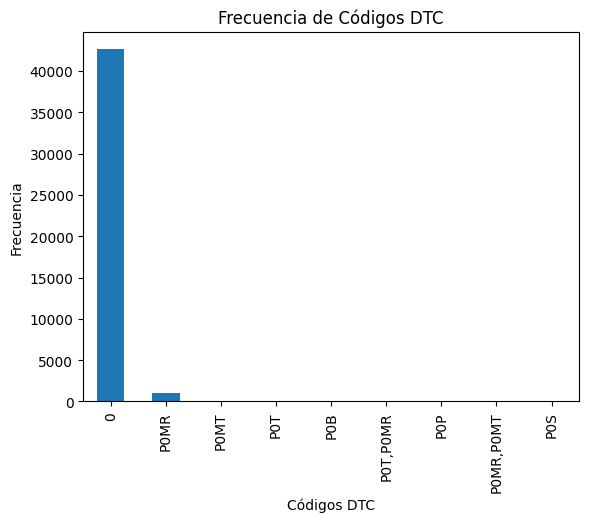

In [24]:
# Visualizar códigos DTC
graficar_codigos_dtc(df_heavy_cat)

**Observaciones:** Como se busca que modelo prediga que el automovil tenga o no fallas, entonces es necesario juntar los códigos de fallas en una sola categoría

In [25]:
# Reemplazar los códigos con falla (P0MR, P0MT, P0T, etc) por 1
df_heavy_cat['DTC'] = df_heavy_cat['DTC'].apply(lambda x: 0 if x == '0' else 1)

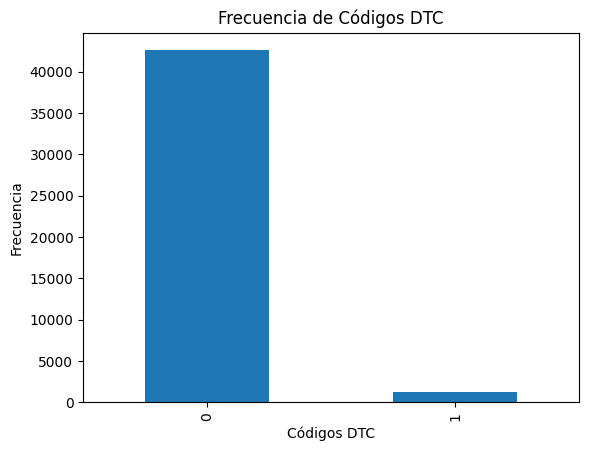

In [26]:
# Visualizar códigos DTC después de imputación
graficar_codigos_dtc(df_heavy_cat)

### **Análisis de columnas númericas**

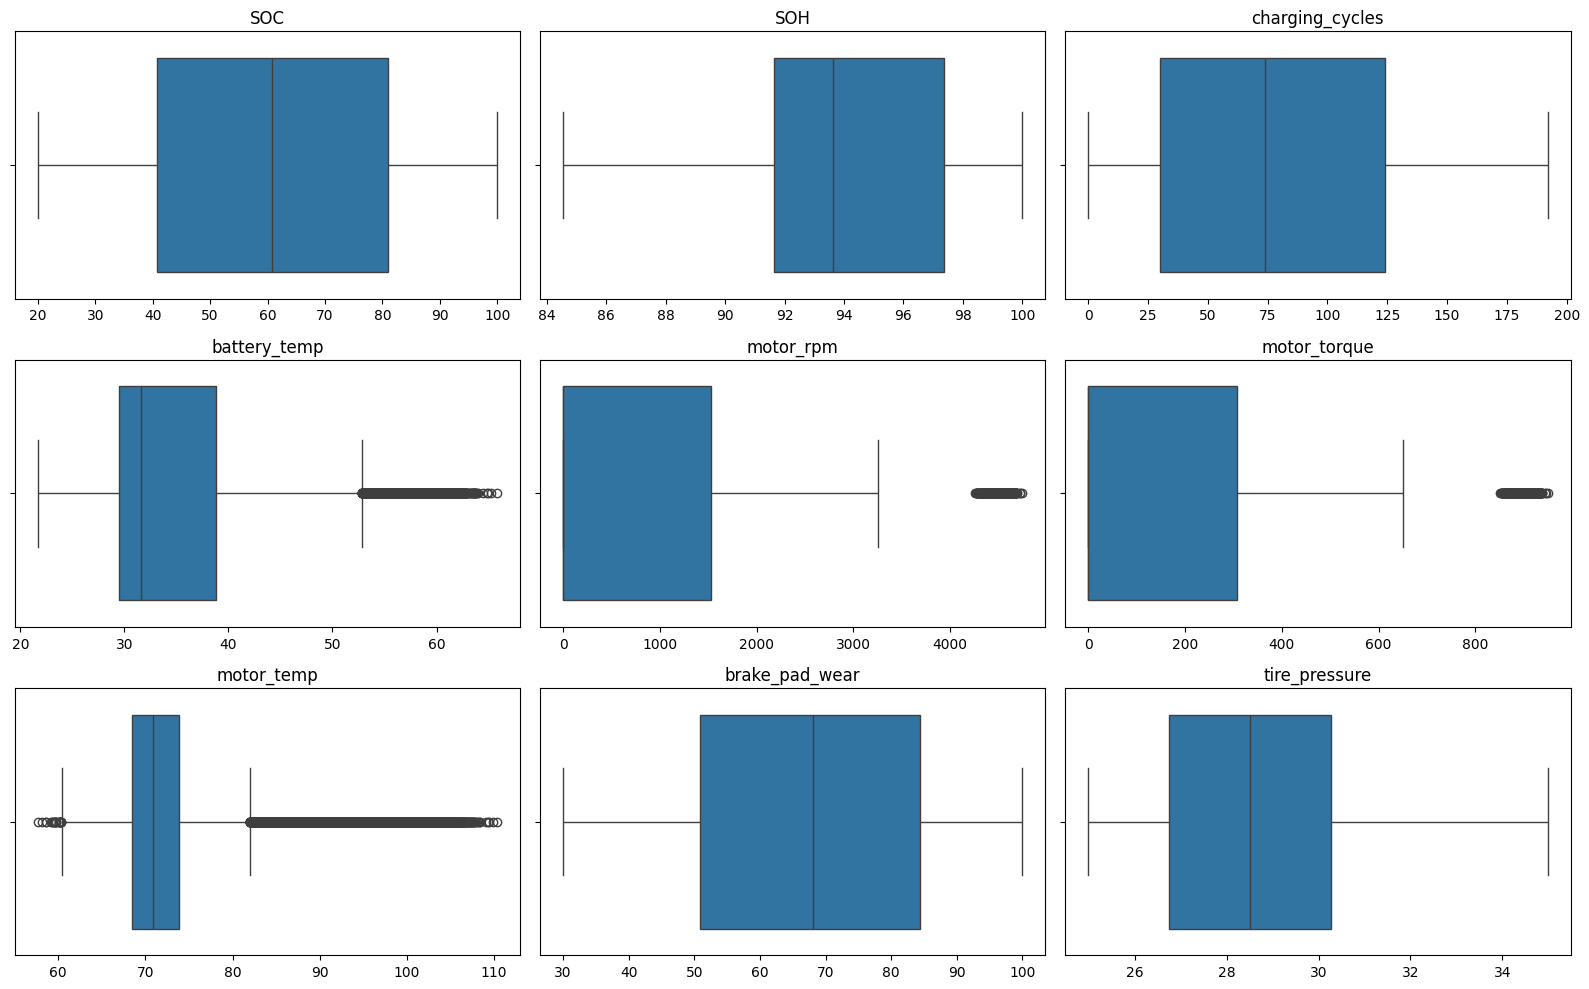

In [27]:
# Analizar variables númericas con gráfico bloxplot
def graficar_boxplot(df_heavy_num):
  columnas = df_heavy_num.columns

  fig, axs = plt.subplots(3, 3, figsize=(16, 10))
  axs = axs.flatten()

  for i, col in enumerate(columnas):
    sns.boxplot(x=df_heavy_num[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('');
    plt.tight_layout();

graficar_boxplot(df_heavy_num)

**Observaciones:**
- SOC: Entre 20% y 100%, no tiene outliers, esto es lo esperado porque la batería nunca baja de 0 ni sube de 100
- SOH: Entre 85% y 100%, no tiene outliers, esto quiere decir que los vehículos están relativamente nuevos
- Charging_cycles: Entre 0 y 200%, tienen una distribución normal, no tienen outliers, se observa que tiene una gran variabilidad de ciclos de carga, esto puede variar por el uso de los vehículos
- Battery_temp: Entre 20 y 53 C°, si tiene varios outiliers, pero esto puede significa que tienen fallos como sistema de refrigeración deficiente, trayectos de carga rápida prolongada, estos outliers no se elimina porque son valiosos para predecir fallos **IMPORTARTE**
- Motor_rpm: Entre 0 y 3300 RPM, tiene outliers cerca de 4500 RPM, estos no se eliminan porque indican sobreaceleración, carga excesiva, modos de emergerngia, son valiosos para predecir fallos **IMPORTANTE**
- Motor_torque: Entre 0 y 6400 Nm, tiene outliers entre 850-900 Nm, estos vehículos eléctricos tienen altas señales de riesgo por resistencia aumentada, errores de sensor CPS, error en la rotación de las ruedas, no se eliminan, son valiosos para predecir fallos **IMPORTANTE**
- Motor_temp: Entre 60-81 C°, tiene outliers muy altos entre 82-110 C°, indica posiblemente sobrecalentamiento del motor, fallos en bomba de refrigeración, fallos en bomba de refrigeración, fallos de rotor, estos outliers son esencialmente ALERTS, no se eliminan, son valiosos para predecir fallos **IMPORTANTE**
- Brake_pad_wear: Entre 30-100, no tiene outliers extremos
- Tire_pressure: Entre 23-35, no tiene outliers extremos

## **Basic Stadistics**

In [28]:
# Observamos las dimensiones de las variables númericas y categorica
print(f'Dimensiones del dataset de variables númericas: {df_heavy_num.shape}')
print(f'Dimensiones del dataset de variables categoricas: {df_heavy_cat.shape}')

Dimensiones del dataset de variables númericas: (43800, 9)
Dimensiones del dataset de variables categoricas: (43800, 1)


In [29]:
# Vista general de las variables númericas
df_heavy_num.describe()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,34.987175


In [30]:
# Vista general de la variable categoríca
df_heavy_cat.describe()

,DTC
count,43800.000000
mean,0.027534
std,0.163636
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [31]:
# Guardamos las variables en un archivo .pickle
df_heavy_num.to_pickle(f'{ubicacion_drive}/df_heavy_num.pickle')
df_heavy_cat.to_pickle(f'{ubicacion_drive}/df_heavy_cat.pickle')

# **Exploratory Data Analysis (EDA)**

In [32]:
# Leemos las variables
df_heavy_num = pd.read_pickle(f'{ubicacion_drive}/df_heavy_num.pickle')
df_heavy_cat = pd.read_pickle(f'{ubicacion_drive}/df_heavy_cat.pickle')

In [33]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Análisis Univariado**

### **Variable Target**

In [34]:
# Vamos a analizar la variable categoríca o el target
df_heavy_cat['DTC'].value_counts()

,count
DTC,
0,42594
1,1206


In [35]:
# Ver proporcion de DTC
df_heavy_cat['DTC'].value_counts(normalize=True) * 100

,proportion
DTC,
0,97.246575
1,2.753425


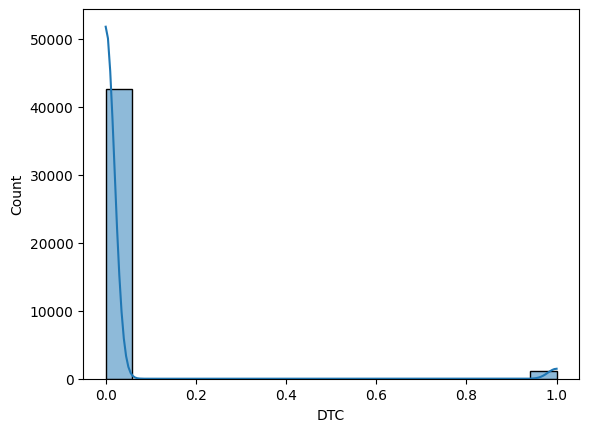

In [36]:
# Dibujar un histograma para visualizar la densidad del target
sns.histplot(df_heavy_cat['DTC'], kde=True);

**Observaciones:** El histograma con curva KDE del target DTC evidencia una distribución altamente concentrada en el valor 0, donde prácticamente todo el gráfico forma un pico masivo en el extremo izquierdo y solo aparece un grupo muy pequeño de casos en 1, casi imperceptible visualmente. Esta forma del gráfico confirma un desbalance severo: la clase “sin fallas” domina el dataset con 42 594 registros, mientras que la clase “con fallas” solo alcanza 1 206, aproximadamente 35–40 veces menos frecuente.

Esta escasez visual y numérica de la clase minoritaria implica que métricas globales como **accuracy** pueden resultar engañosas, ya que un modelo podría predecir siempre la clase 0 y aún así obtener un rendimiento alto. Por ello, será necesario aplicar técnicas para manejar el desbalance (como class weights, oversampling, SMOTE o algoritmos que penalicen los errores sobre la clase 1) con el fin de asegurar que el modelo aprenda a identificar adecuadamente los casos de fallas.

### **Variables Predictoras**

In [37]:
# Vamos a ver un vistazo general de todas las variables númericas
df_heavy_num.describe()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,34.987175


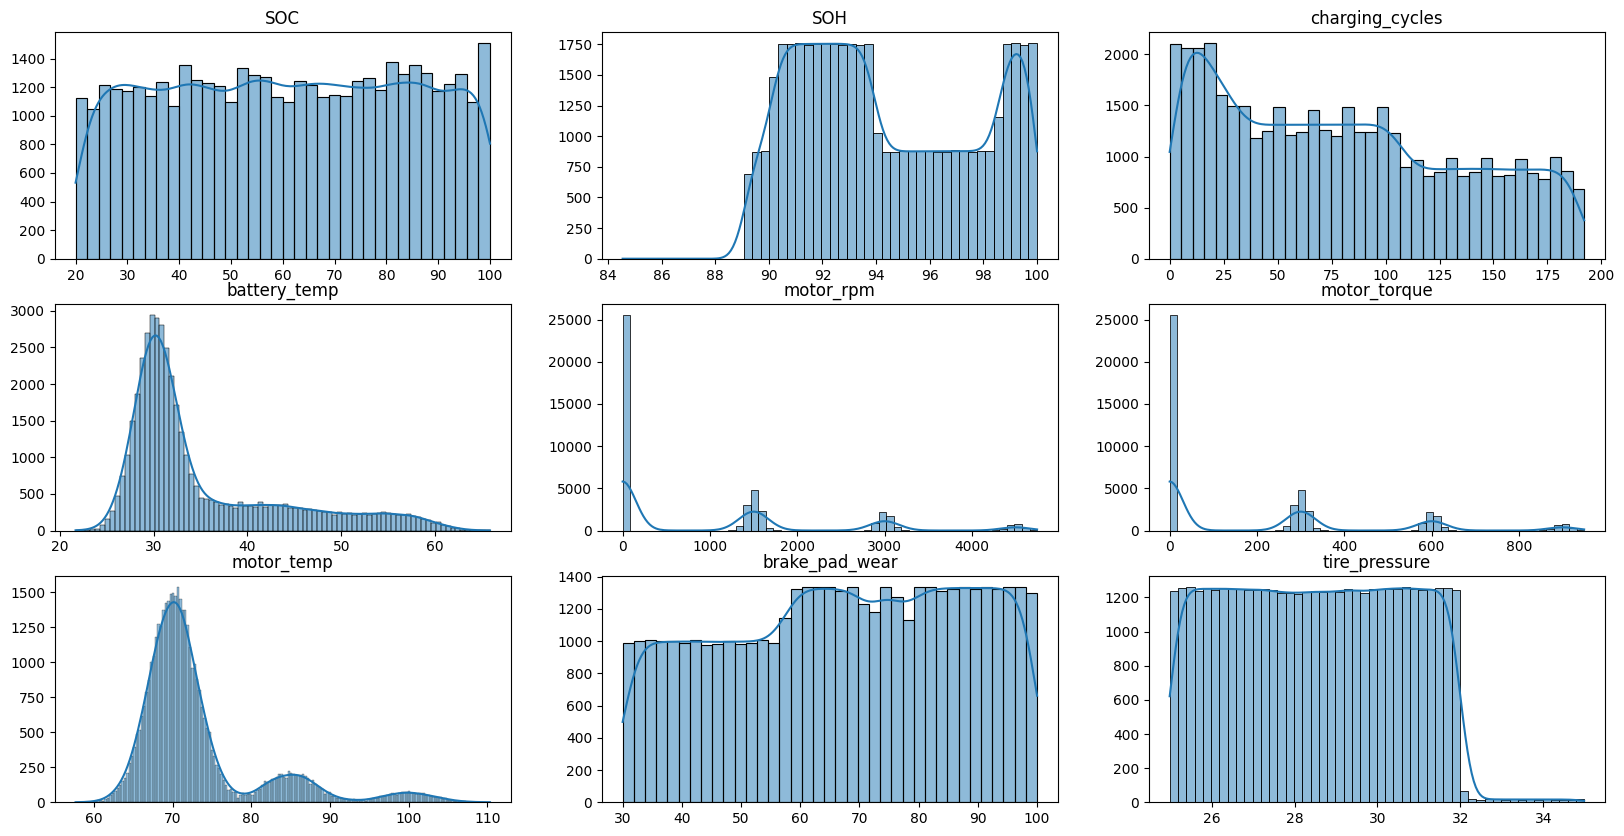

In [38]:
# Vamos a ver como distribución de las variables predictoras con un histograma
def graficar_histplot(df_heavy_num):
  columnas = df_heavy_num.columns

  fig, axs = plt.subplots(3, 3, figsize=(20, 10))
  axs = axs.flatten()

  for i, col in enumerate(columnas):
    sns.histplot(x=df_heavy_num[col], ax=axs[i], kde=True)
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('');

graficar_histplot(df_heavy_num)

**Observaciones:**
- SOC: Distribución relativamente uniforme, sin sesgos marcados y sin valores extremos. Presenta alta variabilidad pero no muestra patrones que sugieran relación directa con fallos, por lo que su relevancia potencial es baja.
- SOH: Distribución fuertemente sesgada hacia valores altos (cerca de 100%). Esto indica que la mayoría de los vehículos mantiene buena salud de batería. Su variación limitada sugiere una relevancia baja o moderada frente a fallos.
- Charging_cycles: Distribución sesgada hacia la izquierda con una tendencia decreciente. Existe un grupo con ciclos muy altos que podría corresponder a vehículos con mayor desgaste acumulado. Potencialmente relevante para fallos debido al envejecimiento del sistema.
- Battery_temp: Sesgo hacia la izquierda, con valores normales concentrados entre 28–42°C y un grupo de temperaturas elevadas que sugieren sobrecalentamiento. Estos valores extremos pueden asociarse a condiciones de riesgo, lo que le otorga una relevancia alta.
- Motor_rpm: Distribución muy sesgada a la izquierda y claramente bimodal, con picos que representan distintos modos de operación (bajo, medio y alto régimen). Los valores más altos pueden coincidir con eventos críticos, por lo que su relevancia es alta.
- Motor_torque: Presenta un patrón similar al de motor_rpm, con picos en regiones específicas y presencia de valores extremadamente altos. Esto sugiere situaciones de carga inusual o potencial deterioro, otorgándole una relevancia alta.
- Motor_temp: Distribución bimodal con sesgo hacia la izquierda y valores extremos elevados que indican sobrecalentamiento. Es una de las variables más informativas, posiblemente el mejor predictor de fallo debido a la sensibilidad del motor a la temperatura.
- Brake_pad_wear: Distribución amplia pero sin sesgo relevante ni valores anómalos. Sugiere desgaste normal del sistema de frenos y una relevancia baja para los fallos analizados.
- Tire_pressure: Distribución uniforme en un rango estable, sin comportamientos anómalos. Relevancia baja debido a su poca variación y su comportamiento estable.

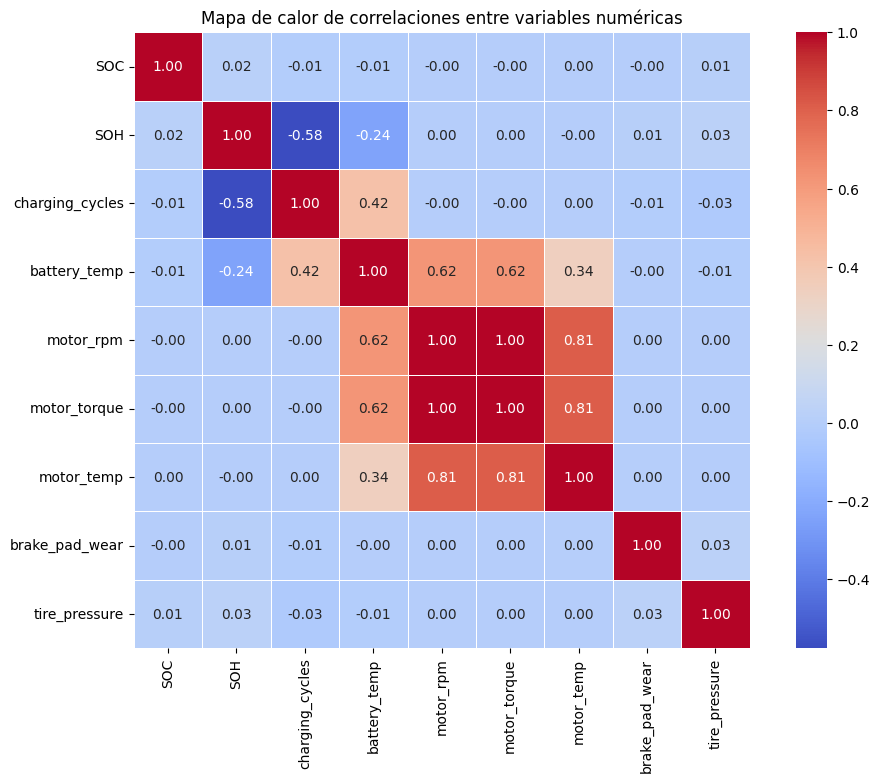

In [39]:
# Vamos a ver como distribución de las variables predictoras con un histograma
def graficar_heatmap(df_heavy_num):
  plt.figure(figsize=(12, 8))
  matriz_corr = df_heavy_num.corr()

  sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True
  )
  plt.title("Mapa de calor de correlaciones entre variables numéricas");

graficar_heatmap(df_heavy_num)

**Observaciones:**
- SOC: Correlaciones prácticamente nulas con todas las variables numéricas, lo que confirma su baja relación tanto con el comportamiento de los sensores como con eventos de riesgo.
- SOH: Correlación negativa moderada con charging_cycles (-0.58), indicando que los vehículos con más ciclos tienden a tener menor salud de batería. También presenta correlación negativa leve con battery_temp (-0.24). No muestra relación con variables dinámicas como rpm o torque.
- Charging_cycles: Correlación positiva moderada con battery_temp (0.42), lo que sugiere que vehículos más usados o envejecidos tienden a operar con temperaturas más elevadas. No se relaciona con rpm ni torque.
- Battery_temp: Correlaciones moderadas con motor_rpm (0.62) y motor_torque (0.62), indicando que el aumento de temperatura del sistema está asociado a mayor demanda del motor. También se relaciona ligeramente con motor_temp (0.34).
- Motor_rpm: Altamente correlacionada con motor_torque (1.00) y motor_temp (0.81), lo que evidencia que estos tres sensores responden al mismo patrón operativo del motor: mayor carga genera mayor temperatura y mayor torque.
- Motor_torque: Correlación perfecta con motor_rpm (1.00) y muy alta con motor_temp (0.81). Esto confirma la fuerte interdependencia entre estos sensores y su rol clave en condiciones extremas o eventos previos a fallo.
- Motor_temp: Correlación alta con motor_rpm (0.81) y motor_torque (0.81), mostrando que el aumento de exigencia mecánica incrementa la temperatura. Podría funcionar como variable sintetizadora del estado del motor.
- Brake_pad_wear: Correlación nula con todas las variables de comportamiento del sistema, lo que indica que el desgaste de frenos evoluciona de forma independiente y no se asocia a condiciones de torque, rpm o temperatura.
- Tire_pressure: Correlaciones prácticamente inexistentes con todas las variables. Muestra un comportamiento independiente y estable, sin relación con otros sensores críticos.

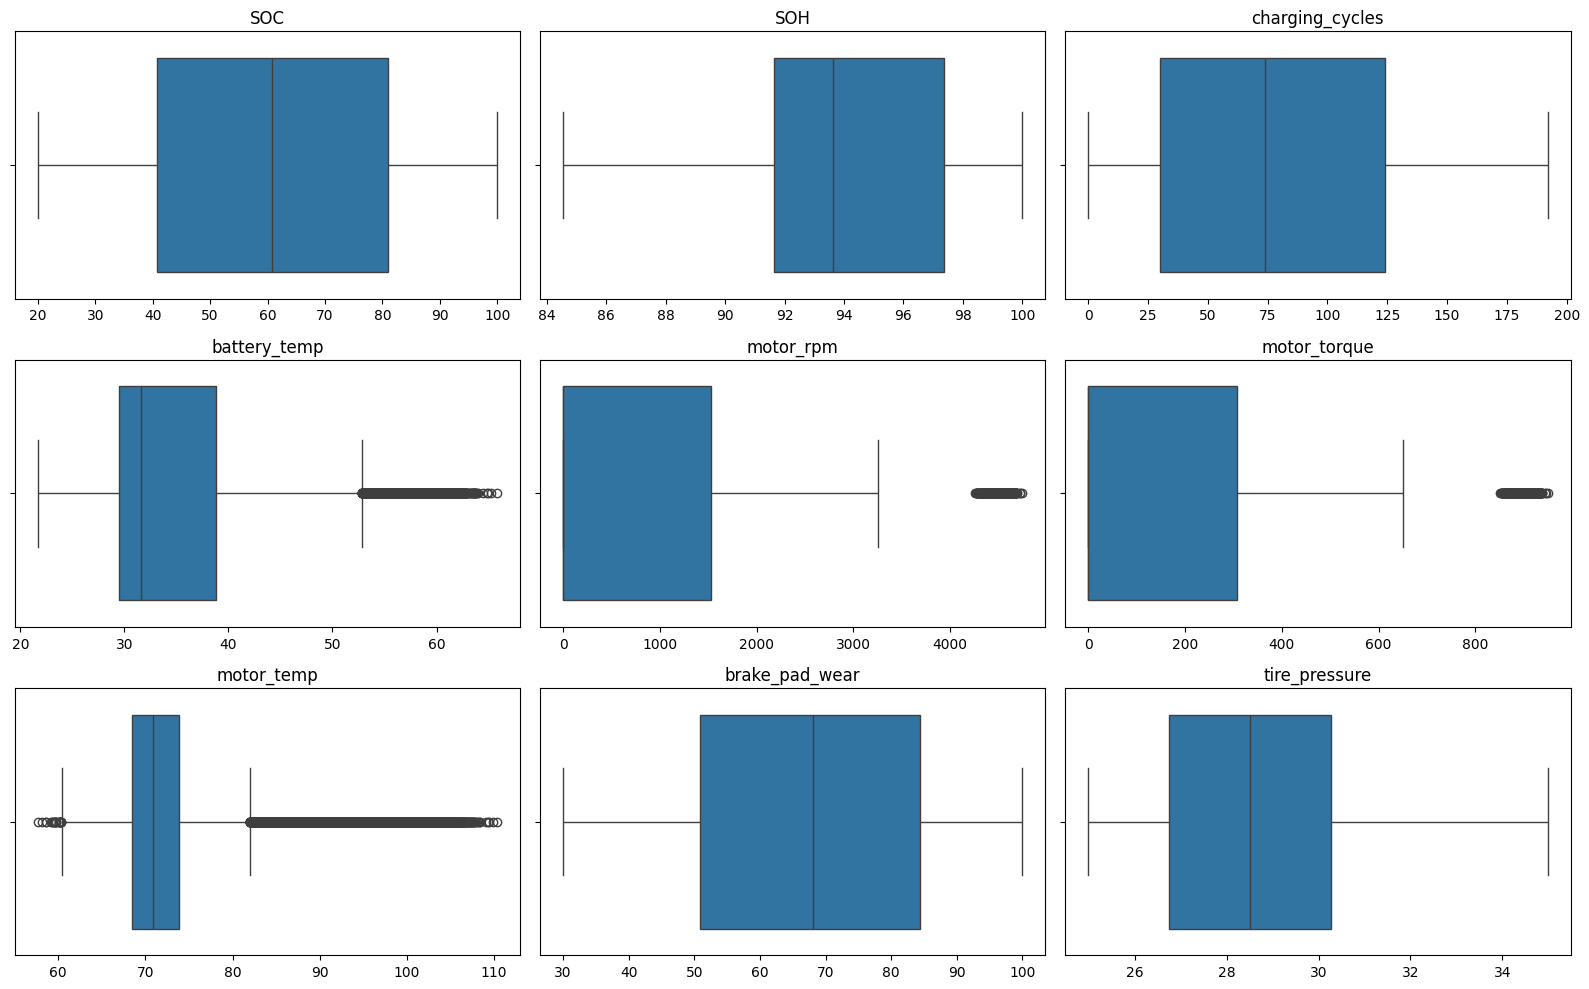

In [40]:
# Análisis de los boxplots
graficar_boxplot(df_heavy_num)

**Observaciones:**
- SOC: Entre 20% y 100%, no tiene outliers, esto es lo esperado porque la batería nunca baja de 0 ni sube de 100
- SOH: Entre 85% y 100%, no tiene outliers, esto quiere decir que los vehículos están relativamente nuevos
- Charging_cycles: Entre 0 y 200%, tienen una distribución normal, no tienen outliers, se observa que tiene una gran variabilidad de ciclos de carga, esto puede variar por el uso de los vehículos
- Battery_temp: Entre 20 y 53 C°, si tiene varios outiliers, pero esto puede significa que tienen fallos como sistema de refrigeración deficiente, trayectos de carga rápida prolongada, estos outliers no se elimina porque son valiosos para predecir fallos **IMPORTARTE**
- Motor_rpm: Entre 0 y 3300 RPM, tiene outliers cerca de 4500 RPM, estos no se eliminan porque indican sobreaceleración, carga excesiva, modos de emergerngia, son valiosos para predecir fallos **IMPORTANTE**
- Motor_torque: Entre 0 y 6400 Nm, tiene outliers entre 850-900 Nm, estos vehículos eléctricos tienen altas señales de riesgo por resistencia aumentada, errores de sensor CPS, error en la rotación de las ruedas, no se eliminan, son valiosos para predecir fallos **IMPORTANTE**
- Motor_temp: Entre 60-81 C°, tiene outliers muy altos entre 82-110 C°, indica posiblemente sobrecalentamiento del motor, fallos en bomba de refrigeración, fallos en bomba de refrigeración, fallos de rotor, estos outliers son esencialmente ALERTS, no se eliminan, son valiosos para predecir fallos **IMPORTANTE**
- Brake_pad_wear: Entre 30-100, no tiene outliers extremos
- Tire_pressure: Entre 23-35, no tiene outliers extremos

**Conclusiones general:**
El análisis univariado permitió identificar patrones fundamentales en el comportamiento de los sensores del vehículo elétrico y reconocer las variables con mayor potencial para explicar la ocurrencia de fallos. Primero, se observo que las variables SOC, SOH, brake_pad_wear y tire_pressure presentan distribuciones establen, sin valores extremos significativos y con correlaciones prácticamente nulas respecto a otras variables. Por tanto, no aportan información relevante para predecir fallos, al menos individualmente.

En cambio, las variables motor_rpm, motor_torque, motor_temp, sus histogramas relevaron distribuciones: Sesgadas, bimodalidad y presencia de valores extremos, que coinciden con escenarios como sobreaceleramiento, exigencias elevadas de torque y sobrecalentamiento; esto se confirmo con los boxplots, donde los outliers no corresponden a errores de medición, sino eventos relevantes que se deben mantener porque capturan comportamientos asociados a fallos. Asimismo, el mapa de calor evidenció correlaciones muy altas entre estas 3 variables, esto sugiere que forma un núcleo de variables mecánicas directamente relacionadas con el riesgo de fallo.

Asimismo, las variables battery_temp y charging_cycles son variables relevante, porque battery_temp presentó una distribución sesgada a la derecha y outliers que corresponden a eventos de sobrecalentamiento. Y charging_cycles mostró una clara tendencia decreciente con un subgrupo de valores muy altos, típicos de vehículos con desgaste avanzado. Y las correlaciones entre estas dos variables junto con el motor refuerzan su importancia en la detección temprana de deterioro o uso intensivo.

En conclusión, las variables motor_rpm, motor_torque, motor_temp, battery_temp y charging_cycles conforman un comportamiento que puede proporcionar la detección de fallo, por lo que se evaluará ahora con la variable target para determinar su contribución real.

## **Análisis Bivariado**

In [41]:
# Unir variables categoricas con númericas
df = pd.concat([df_heavy_num, df_heavy_cat], axis=1)

In [42]:
df.head()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure,DTC
0,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,34.987175,0
1,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,34.976006,0
2,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,34.961510,0
3,20.0,99.998996,0,29.370583,0.0,0.0,73.446945,100.0,34.949125,0
4,20.0,99.998749,0,30.808790,0.0,0.0,70.240659,100.0,34.935932,0


### **Variables númericas vs binario**

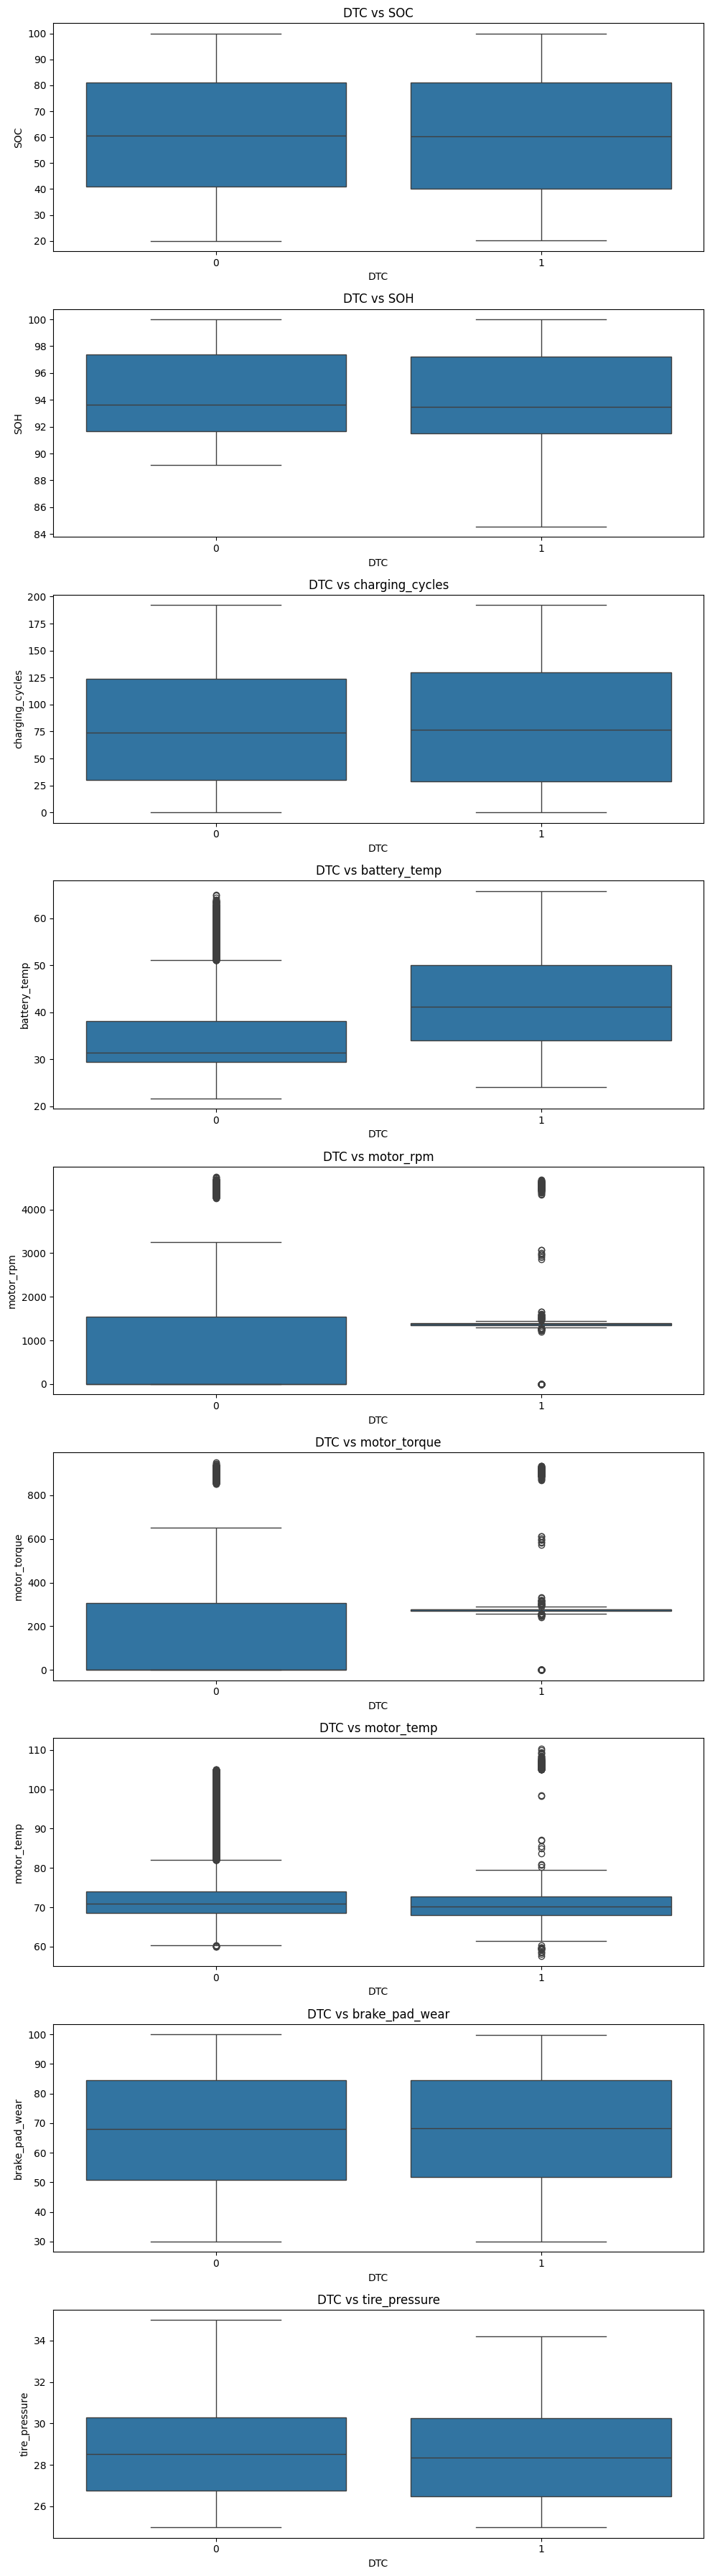

In [43]:
# Vamos a ver la relación estadística entre la variables predictoras con el target
def boxplots_bivariado(df, features, target):
  fig, axs = plt.subplots(nrows=len(features), figsize=(10, 4*len(features)))
  for i, col in enumerate(features):
    sns.boxplot(x=target, y=col, data=df, ax=axs[i])
    axs[i].set_title(f"{target} vs {col}")
    plt.tight_layout()

features = df.drop('DTC', axis=1).columns # ['charging_cycles', 'battery_temp', 'motor_rpm', 'motor_torque', 'motor_temp']
boxplots_bivariado(df, features, 'DTC')

**Observaciones:**
- SOC: El SOC presenta cajas prácticamente superpuestas entre las clases 0 y 1, con medianas muy similares y bigotes que cubren el mismo rango operativo (cercano a 20–100%). No hay desplazamientos en la posición de la caja ni diferencias claras en dispersión. La clase 1 muestra apenas algunos outliers más extendidos en los extremos bajos, pero no son suficientes para marcar un patrón diferenciador. Este comportamiento indica que el nivel de carga de la batería no ofrece señal predictiva útil para anticipar fallos, pues el sistema opera bajo dinámicas de carga indistinguibles entre fallos y condiciones normales.
- SOH: El SOH muestra la misma estructura entre clases: cajas estrechas, medianas casi idénticas (~94–95%) y ausencia de outliers significativos que separen patrones entre 0 y 1. El comportamiento es estable y homogéneo, como ocurre en sistemas donde el deterioro gradual no tiene relación directa con la aparición inmediata de fallos operativos. Esto sugiere que el SOH no captura mecanismos de fallo agudo, sino deterioros lentos que no diferencian entre los dos estados del DTC. Por tanto, su capacidad predictiva es baja.
- Charging_cycles: El boxplot muestra que la caja, la mediana y la dispersión de los ciclos de carga son prácticamente idénticas entre las clases 0 (sin fallo) y 1 (con fallo). La variabilidad es alta en ambos grupos y no existen outliers diferenciadores que separen claramente los comportamientos. Esto indica que esta variable no presenta patrones distribucionales útiles para distinguir fallos, ya que ambos grupos ocupan el mismo rango operativo sin diferencias en posición ni forma.
- Battery_temp: La variable presenta cajas desplazadas entre clases: la clase 0 concentra su densidad entre 28–35 °C, mientras que la clase 1 tiene una caja más alta (35–45 °C) y mayor dispersión hacia temperaturas elevadas. Los outliers de la clase 0 coinciden con los valores normales de la clase 1, lo cual es un patrón típico de variable predictiva: los valores extremos para la clase 0 se vuelven frecuentes para la clase 1. Esto evidencia una separación clara entre grupos, posicionando a la temperatura de batería como un indicador robusto de riesgo térmico.
- Motor_rpm: El boxplot evidencia una fuerte diferencia en concentración entre clases. La clase 0 muestra una caja grande y muy dispersa (0–3000 RPM), mientras que la clase 1 tiene una caja estrecha centrada alrededor de 1300–1500 RPM, lo que evidencia un modo principal de fallo. Los outliers superiores de la clase 1 (3000–4500 RPM) representan un segundo modo de fallo en condiciones extremas. Esta mezcla de alta concentración local más outliers críticos convierte a motor_rpm en un predictor relevante para detectar fallos en rangos específicos de operación.
- Motor_torque: El patrón es parecido al de motor_rpm: la clase 0 exhibe alta dispersión y una caja amplia, mientras que la clase 1 presenta una caja más compacta en torno a 250–300 Nm. Los outliers ubicados entre 850–900 Nm en clase 1 reflejan fallos bajo cargas extremas. La coexistencia de un rango de concentración (fallos moderados) y cola extendida (fallos severos) convierte a motor_torque en un indicador potente de condiciones mecánicas críticas y en uno de los predictores más sólidos del conjunto.
- Motor_temp: El bloxplot evidencia que los bigotes de ambas clases son similares, los outliers muestran un patrón diferenciador clave: en clase 0 los valores altos son casos raros (outliers aislados), mientras que en clase 1 los valores extremos son mucho más frecuentes y alcanzan temperaturas superiores (hasta ≈110°C). Esto indica que el sobrecalentamiento severo es un indicador fuerte de fallo y permite distinguir condiciones críticas aun cuando la mediana y el rango intercuartil son similares entre clases.
- Brake_pad_wear: La variable de desgaste de frenos presenta cajas prácticamente iguales para ambas clases, con mediana alrededor de 70% y dispersión similar entre ~30% y ~100%. La clase 1 no presenta outliers característicos ni colas asimétricas respecto a la clase 0. Esto señala que el desgaste de frenos, aunque puede ser relevante en mantenimiento general, no muestra relación directa con la activación de fallos registrados en el DTC. Operan en rangos indistinguibles, por lo que su aporte como predictor es mínimo.
- Tire_pressure: La presión de llantas muestra la menor variabilidad de todas: cajas compactas, medianas idénticas (~29–30 psi) y bigotes casi calcados en ambas clases. La ausencia total de outliers diferenciadores confirma que los fallos captados por el DTC no están asociados a la presión de neumáticos. Es una variable mecánica estable y por lo general controlada por regulación, lo cual explica la falta de señal predictiva. Esta variable aporta muy poco al modelo.

**Ranking de variables predictoras fuertes:**
- Battery_temp
- Motor_torque
- Motor_rpm
- Motor_temp


**Ranking de variables predictoras débiles:**
- Charging_cycles
- SOC
- SOH
- Brake_pad_wear
- Tire_pressure

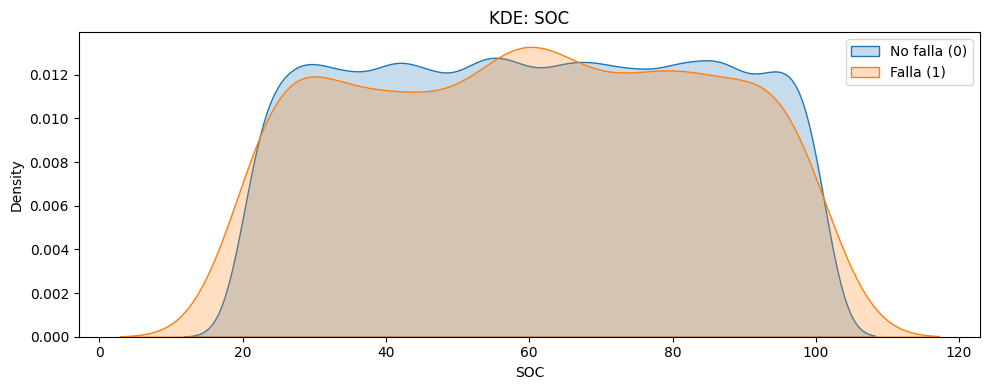

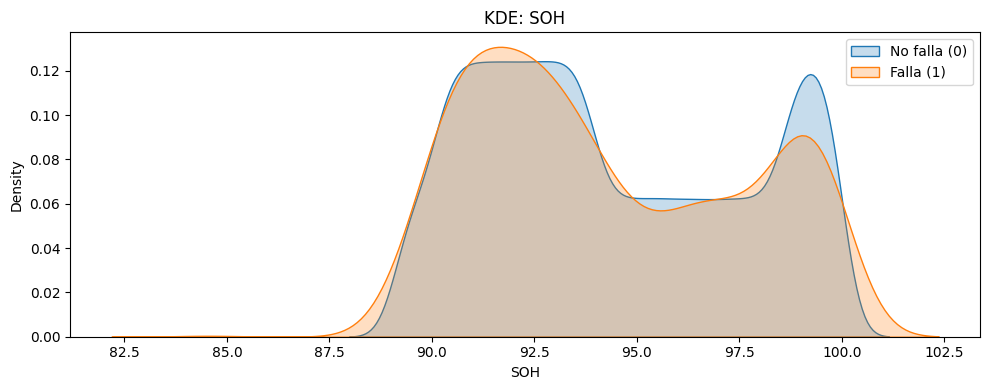

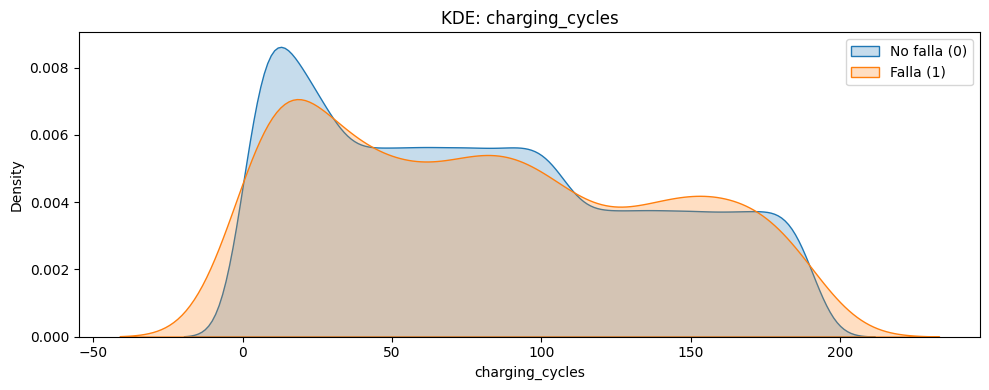

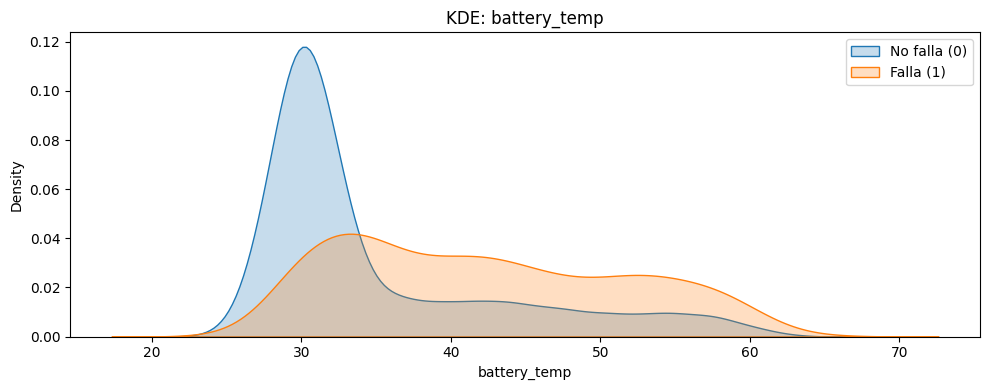

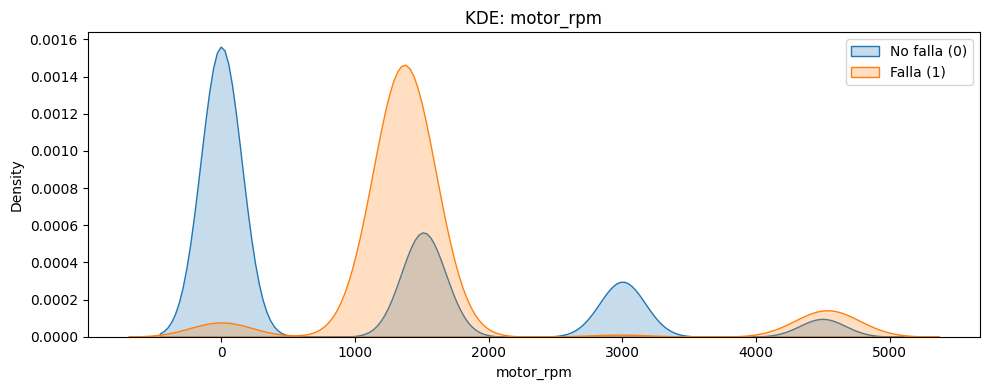

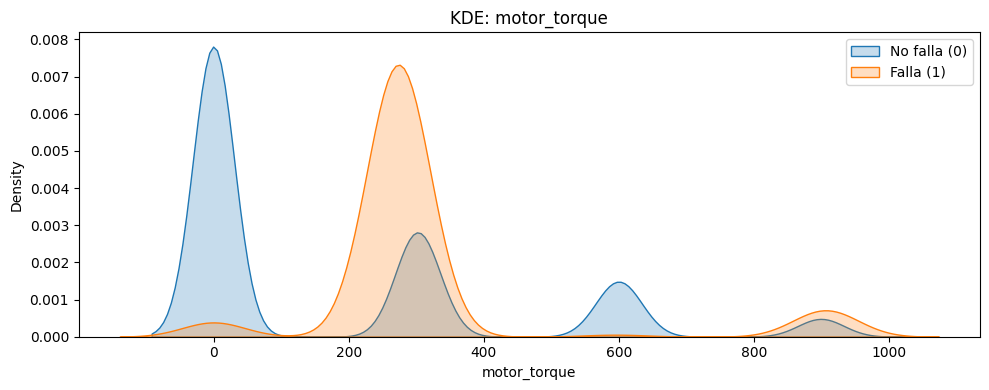

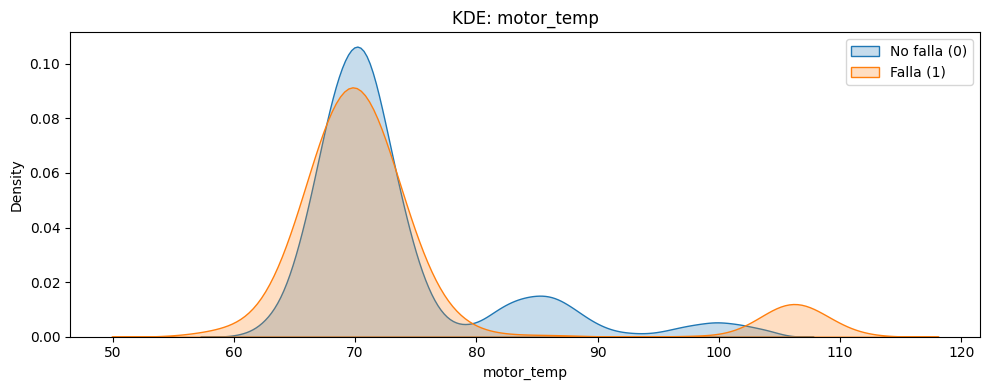

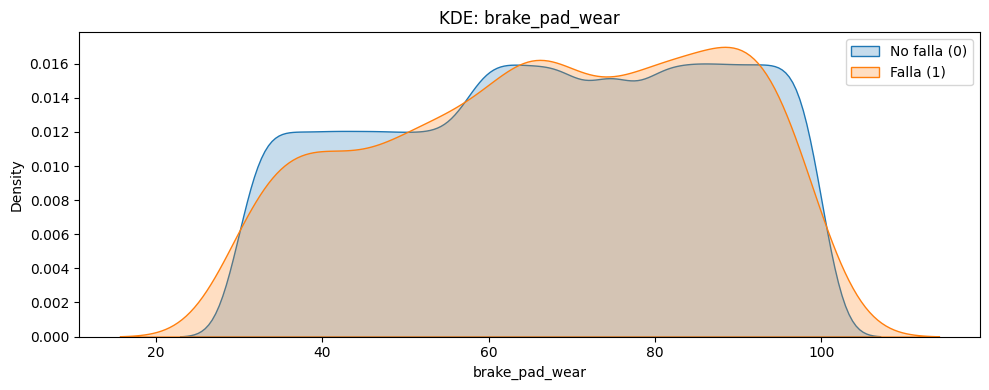

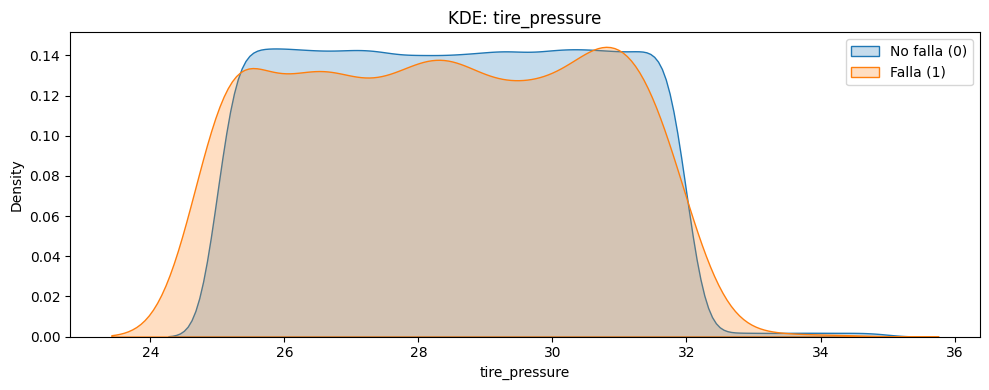

In [44]:
# Vamos a ver la distribución de las variables predictoras con el target
def kde_superpuesto(df, features, target):
  for col in features:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[df[target]==0][col], label="No falla (0)", fill=True)
    sns.kdeplot(df[df[target]==1][col], label="Falla (1)", fill=True)
    plt.title(f"KDE: {col}")
    plt.legend()
    plt.tight_layout();

features = df.drop('DTC', axis=1).columns#['charging_cycles', 'battery_temp', 'motor_rpm', 'motor_torque', 'motor_temp']
kde_superpuesto(df, features, 'DTC')

**Observaciones:**
- SOC: El KDE de SOC muestra una superposición casi total entre clases, con densidades muy similares desde 20% hasta 100%. No existe un desplazamiento sistemático ni mayor variabilidad en la clase 1; la pequeña elevación cerca de 60% no constituye un patrón estable. Esta simetría distribucional indica que SOC no aporta señal predictiva clara, porque ambas clases utilizan prácticamente el mismo rango de carga sin cambios en forma, posición o cola.
- SOH: El KDE de SOH presenta dos picos suaves compartidos por ambas clases (≈92% y ≈99%), lo que revela un comportamiento altamente solapado. La clase 1 tiene ligeramente más densidad alrededor de 92% y la clase 0 algo más cerca de 99%, pero estas diferencias son mínimas y no generan una separación consistente. La distribución estrecha y estable indica que SOH no distingue fallos, porque incluso cuando ocurre un DTC, la salud de la batería permanece dentro del rango normal.
- Charging_cycles: El KDE exhibe una superposición casi completa entre las clases 0 y 1 en toda la distribución de charging_cycles, mostrando densidades prácticamente idénticas salvo un ligero incremento de la clase 1 alrededor de los 150 ciclos, sin que ello constituya un patrón estructural ni una separación consistente. La alta variabilidad pero baja diferenciación entre curvas indica que charging_cycles aporta muy poco valor discriminativo para predecir fallos inmediatos y no captura mecanismos operativos que diferencien claramente ambas clases.
- Battery_temp: El KDE muestra que la clase 0 concentra su densidad en un rango estrecho de 28–35°C, mientras que la clase 1 presenta una densidad más amplia y dominante desde 30°C hasta aproximadamente 65°C, reflejando mayor variabilidad térmica en escenarios de fallo. Esta separación progresiva entre curvas indica que el riesgo de fallo aumenta a medida que la temperatura de la batería se eleva, con un umbral crítico perceptible cerca de 40°C, donde la densidad de falla supera claramente a la normal, por lo que battery_temp se consolida como un predictor térmico relevante y con fuerte señal.
- Motor_rpm: El KDE revela una bimodalidad marcada con diferencias nítidas entre clases: los fallos tienen mayor densidad en torno a 1500 RPM, las condiciones normales dominan cerca de 3000 RPM y los fallos reaparecen ligeramente por encima de 4500 RPM, sugiriendo la existencia de dos mecanismos distintos de fallo (cargas medias inestables y cargas extremas). La separación localizada de densidades entre clases convierte al motor_rpm en uno de los mejores predictores, ya que captura comportamientos dinámicos que no aparecen en otras variables.
- Motor_torque: El KDE reproduce una estructura bimodal semejante a la de motor_rpm debido a la fuerte dependencia mecánica entre torque y régimen del motor: la clase 1 domina en el rango 250–350 Nm, la clase 0 domina en zonas estables cercanas a 600 Nm, y la clase 1 vuelve a elevar densidad cerca de 900 Nm, asociadas a esfuerzos extremos. Esta bimodalidad con separación clara en puntos específicos convierte al torque en un predictor robusto de fallos, especialmente en situaciones de carga irregular o transiciones de esfuerzo.
- Motor_temp: El KDE muestra una amplia superposición entre clases en el rango operativo 60–80°C, lo que limita su capacidad predictiva en condiciones normales; sin embargo, la clase 1 incrementa su densidad de manera pronunciada alrededor de 105°C, señalando sobrecalentamiento severo como precursor claro de fallo. Además, presenta pequeños picos cerca de 70°C asociados más a fallos electrónicos o de sensores que a la temperatura en sí. En conjunto, motor_temp posee valor predictivo moderado, concentrado principalmente en los extremos superiores de la distribución.
- Brake_pad_wear: El KDE de brake_pad_wear muestra curvas casi idénticas entre clases en todo el rango de desgaste (cercano a 30–100%). La clase 1 presenta un aumento marginal de densidad en torno a 85–90%, pero la superposición es tan grande que no existe una señal distintiva. La variabilidad es similar en ambas clases, lo que sugiere que el desgaste de frenos no influye directamente en los fallos del sistema, al menos no en los tipos evaluados por DTC.
- Tire_pressure: El KDE de tire_pressure evidencia una distribución extremadamente solapada, con densidades casi iguales entre 26 y 32 psi. La clase 1 muestra un pequeño desplazamiento hacia valores apenas inferiores (≈25 psi), pero esto se diluye dentro de la variabilidad general. No hay cambios en la forma de la curva ni colas diferenciadoras, por lo que la presión de neumáticos no aporta valor predictivo relevante para diferenciar condiciones normales y fallas.

**Ranking de variables predictivas fuertes:**
- Motor_rpm
- Motor_torque
- Battery_temp
- Motor_temp

**Ranking de variables predictivas débiles:**
- Charging_cycles
- SOC
- SOH
- Brake_pad_wear
- Tire_pressure

**Conclusión:**
El análisis bivariado mostró que los fallos (DTC=1) no dependen de una sola variable, sino de combinaciones específicas de condiciones operativas. Las variables térmicas y mecánicas (battery_temp, motor_temp, motor_rpm y motor_torque) revelan patrones claros solo cuando se observan en conjunto, evidenciando que los fallos emergen de sinergias de carga, temperatura y esfuerzo, y no de valores aislados. Los puntos de fallo se concentran en zonas donde la batería opera a temperaturas elevadas mientras el motor trabaja en rangos particulares de RPM y torque, confirmando mecanismos de estrés térmico y sobrecarga dinámica. En cambio, variables como SOC, SOH, brake_pad_wear, tire_pressure presentan una dispersión homogénea entre clases, indicando que su relación con el fallo es mínima y que su aporte predictivo es marginal. En general, las interacciones bivariadas refuerzan que la predicción del fallo requiere un modelo multivariable capaz de captar patrones no lineales entre temperatura, régimen mecánico y carga, lo cual justifica el uso de algoritmos supervisados avanzados como Random Forest y XGBoost para capturar estas dependencias complejas.

### **Variables númericas vs númericas**

In [45]:
def comparar_features(df, var_x, var_y, titulo=None, hue_col='DTC', size=(7, 5)):
  plt.figure(figsize=size)
  sns.scatterplot(
    data=df,
    x=var_x,
    y=var_y,
    hue=hue_col,
    alpha=0.6,
    palette={0: "#1f77b4", 1: "#ff7f0e"}
  )
  if titulo:
    plt.title(titulo)
  else:
    plt.title(f"{var_y} vs {var_x} según {hue_col}")
  plt.xlabel(var_x)
  plt.ylabel(var_y)
  plt.grid(alpha=0.2)
  plt.tight_layout();

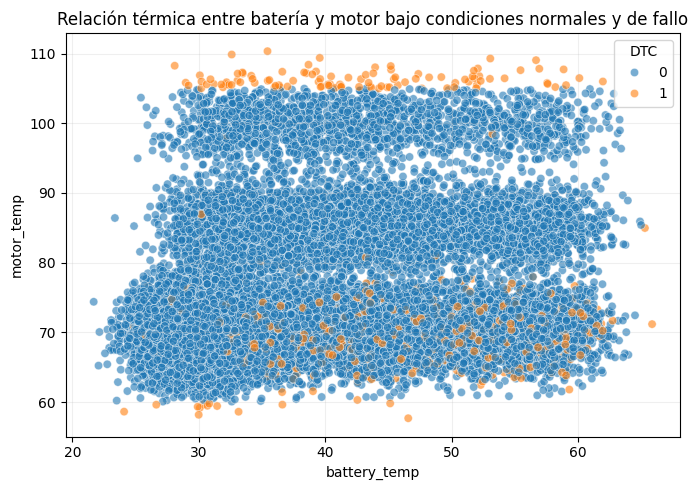

In [46]:
# Relación térmica entre batería y motor bajo condiciones normales y de fallo
comparar_features(df, 'battery_temp', 'motor_temp', 'Relación térmica entre batería y motor bajo condiciones normales y de fallo')

**Intepretación:** La combinación de ambas temperaturas muestra dos zonas claras de fallo: una donde ambas temperaturas son altas (motor >100 °C y batería >40 °C), lo que sugiere un fallo térmico combinado, y otra donde el motor está alrededor de 70–80 °C y la batería entre 35–45 °C, lo que apunta a fallos más eléctricos o de control. La clase 1 se agrupa en puntos concretos del gráfico, lo que indica que esta interacción sí revela patrones de riesgo reales.

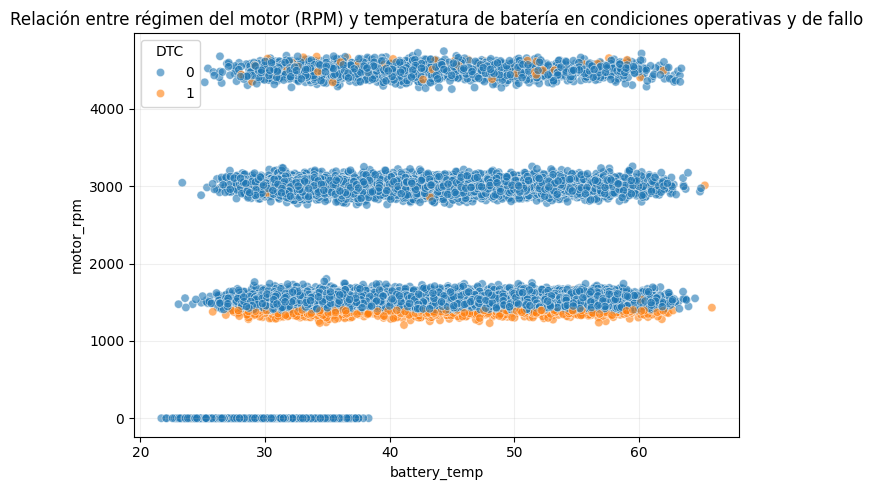

In [47]:
# Relación entre régimen del motor (RPM) y temperatura de batería en condiciones operativas y de fallo
comparar_features(df, 'battery_temp', 'motor_rpm', 'Relación entre régimen del motor (RPM) y temperatura de batería en condiciones operativas y de fallo')

**Interpretación:** La distribución forma bandas horizontales en 0, cercano a 1500, 3000 y 4500 RPM, típicas de distintos modos de operación. Los fallos aparecen casi únicamente en la banda de 1500 RPM, lo que indica que el régimen medio del motor es la franja más inestable. Sin embargo, la temperatura de batería no añade información relevante aquí: los fallos dependen más del RPM que de la batería, por lo que esta combinación aporta poca señal adicional.

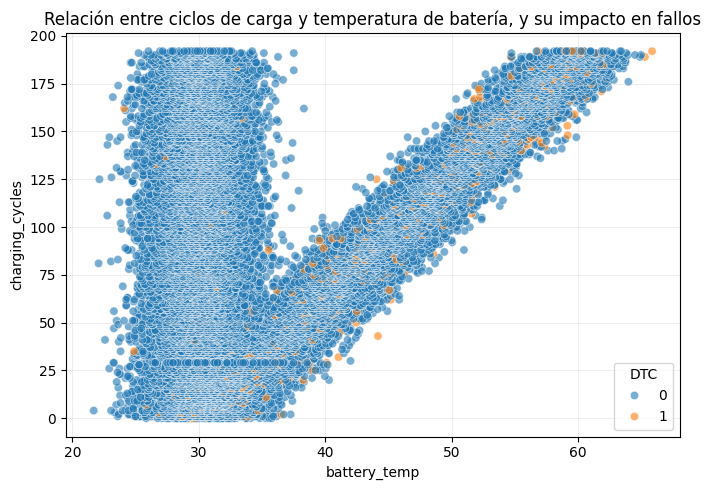

In [48]:
# Relación entre ciclos de carga y temperatura de batería, y su impacto en fallos
comparar_features(df, 'battery_temp', 'charging_cycles', 'Relación entre ciclos de carga y temperatura de batería, y su impacto en fallos')

**Observaciones:** Esta comparación muestra una nube dispersa sin estructura, donde los fallos están repartidos de forma aleatoria en todo el espacio y no existe una separación visible entre clases. Charging_cycles mantiene la misma variabilidad sin importar si hay fallo o no, lo que confirma que es una variable sin poder predictivo real en combinación con la temperatura de batería.

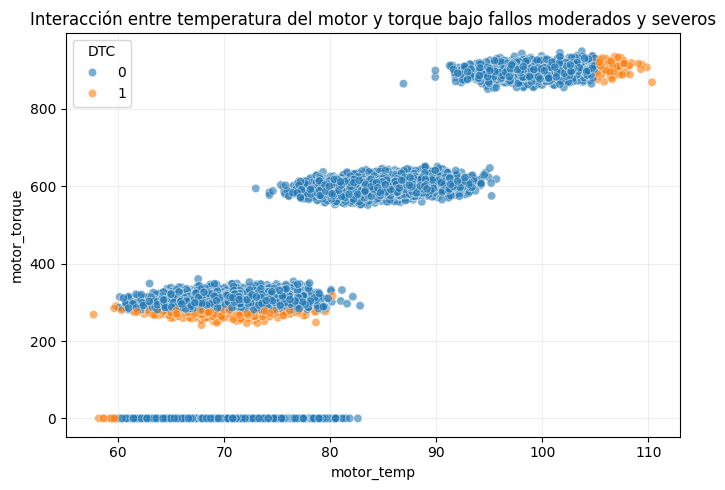

In [49]:
# Interacción entre temperatura del motor y torque bajo fallos moderados y severos
comparar_features(df, 'motor_temp', 'motor_torque', 'Interacción entre temperatura del motor y torque bajo fallos moderados y severos')

**Interpretación:** Aquí surge uno de los patrones más fuertes: los fallos se agrupan en dos “islas” muy definidas, una en carga moderada (cercano a 250–300 Nm con motor entre 65–80 °C) y otra en carga extrema (cercano 850–900 Nm con motor >100 °C). Esto indica dos mecanismos distintos de fallo, uno leve–moderado y otro severo, lo que convierte a esta combinación en la más informativa para detectar comportamientos anormales del motor.

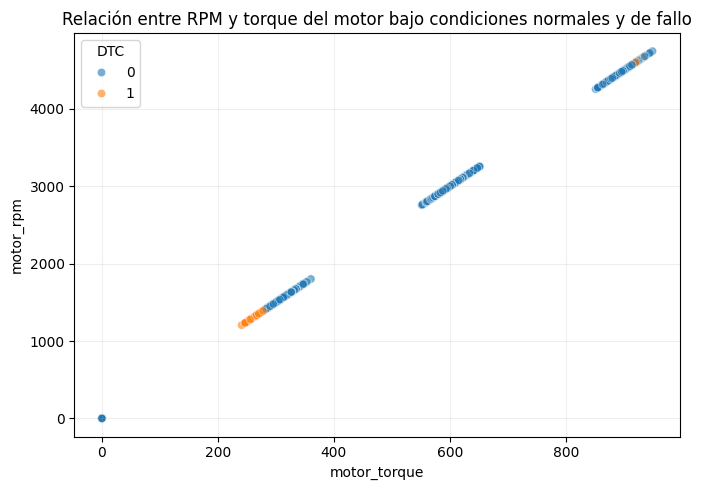

In [50]:
# Relación entre RPM y torque del motor bajo condiciones normales y de fallo
comparar_features(df, 'motor_torque', 'motor_rpm', 'Relación entre RPM y torque del motor bajo condiciones normales y de fallo')

**Interpretación:** El gráfico revela una relación casi lineal por bandas operativas, donde los fallos se concentran principalmente en el rango de 1300–1500 RPM y cerca de 4500 Nm, lo que coincide con cargas medias donde el sistema suele ser más sensible. Aunque la estructura es limpia y lógica mecánicamente, este patrón es ligeramente menos expresivo que motor_torque + motor_temp, pero sigue siendo una combinación predictiva fuerte.

## **Conclusiones finales**

El análisis univariado, bivariado, los boxplots y los KDE convergen en una misma idea central: los fallos no se distribuyen aleatoriamente, sino que aparecen agrupados en condiciones térmicas y mecánicas específicas. En particular, se confirmó que variables como motor_torque, motor_rpm, motor_temp y battery_temp contienen patrones estructurados que diferencian claramente las clases, mientras que charging_cycles no aporta información útil para predecir fallos inmediatos. Además, el análisis combinado entre variables revela que existen dos modos principales de fallo: uno moderado, relacionado con cargas medias e inestabilidad térmica, y otro severo, asociado a sobrecalentamiento extremo y torque elevado. Esta estructura multimodal indica que el sistema falla por mecanismos distintos, lo cual coincide con comportamientos reales de motores eléctricos sometidos a variaciones bruscas en carga o temperatura.
En resumen, el EDA permitió identificar un conjunto reducido y de alto valor predictivo, donde la señal es suficientemente clara para construir un modelo de clasificación confiable.

**Ranking final de variables predictivas**
- Motor_torque: Muestra los patrones más definidos de fallo tanto en rangos moderados como extremos.
- Motor_rpm: Refuerza los mismos modos de fallo que torque (son operacionalmente dependientes).
- Motor_temp: Aporta señal clara principalmente en el extremo superior (sobrecalentamiento).
- battery_temp: Buen predictor térmico, aunque la señal está más distribuida.
- Charging_cycles: No discrimina entre clases, por tanto, se descarta del modelo.

## **Análitica**

In [51]:
# Resumen de análisis univariado
def resumen_univariado(df):
    resumen = pd.DataFrame({
        "media": df.mean(),
        "mediana": df.median(),
        "desv_std": df.std(),
        "q1": df.quantile(0.25),
        "q3": df.quantile(0.75),
        "IQR": df.quantile(0.75) - df.quantile(0.25),
        "asimetría": df.skew(),
        "outliers_detectados": [
            ((df[col] < (df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)))) |
             (df[col] > (df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25))))).sum()
            for col in df.columns
        ]
    })
    return resumen

tabla_univariado = resumen_univariado(df_heavy_num)
tabla_univariado.to_csv(f'{ubicacion_drive}/tabla_univariado.csv', index=False)
tabla_univariado.head()

,media,mediana,desv_std,q1,q3,IQR,asimetría,outliers_detectados
SOC,60.817630,60.718705,23.251624,40.805185,80.990738,40.185553,-0.004423,0
SOH,94.370603,93.641809,3.225082,91.632924,97.369855,5.736931,0.278264,0
charging_cycles,80.127329,74.000000,55.288573,30.000000,124.000000,94.000000,0.335995,0
battery_temp,35.229109,31.574952,8.593342,29.521866,38.855954,9.334088,1.361130,3125
motor_rpm,936.372513,0.000000,1285.998029,0.000000,1532.385970,1532.385970,1.205678,1846


In [52]:
# Resumen de análisis bivariado
def resumen_bivariado(df, target="DTC"):
    variables = df.drop(columns=[target]).columns
    resumen = []

    for col in variables:
        median_0 = df[df[target] == 0][col].median()
        median_1 = df[df[target] == 1][col].median()
        diff = median_1 - median_0

        resumen.append({
            "Variable": col,
            "Mediana_clase_0": median_0,
            "Mediana_clase_1": median_1,
            "Diferencia_mediana": diff,
            "Desviación_clase_0": df[df[target] == 0][col].std(),
            "Desviación_clase_1": df[df[target] == 1][col].std(),
        })

    return pd.DataFrame(resumen)

tabla_bivariado = resumen_bivariado(df)
tabla_bivariado.to_csv(f'{ubicacion_drive}/tabla_bivariado.csv', index=False)
tabla_bivariado.head()

,Variable,Mediana_clase_0,Mediana_clase_1,Diferencia_mediana,Desviación_clase_0,Desviación_clase_1
0,SOC,60.718705,60.349313,-0.369391,23.239159,23.692719
1,SOH,93.644459,93.472327,-0.172132,3.224041,3.261742
2,charging_cycles,74.000000,76.500000,2.500000,55.248786,56.679455
3,battery_temp,31.483801,41.130215,9.646413,8.486845,9.364715
4,motor_rpm,0.000000,1377.677505,1377.677505,1289.244923,957.322256


In [53]:
# Correlaciones multivariado
corr = df_heavy_num.corr()

tabla_multivariado = corr
tabla_multivariado.to_csv(f'{ubicacion_drive}/tabla_multivariado.csv', index=False)
tabla_multivariado.head()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
SOC,1.000000,0.018185,-0.008084,-0.007215,-0.000066,-0.000066,0.001162,-0.001242,0.008511
SOH,0.018185,1.000000,-0.576605,-0.243965,0.001984,0.001984,-0.000152,0.013612,0.032649
charging_cycles,-0.008084,-0.576605,1.000000,0.424080,-0.000148,-0.000148,0.001460,-0.006915,-0.025389
battery_temp,-0.007215,-0.243965,0.424080,1.000000,0.619503,0.619503,0.336990,-0.001741,-0.008623
motor_rpm,-0.000066,0.001984,-0.000148,0.619503,1.000000,1.000000,0.809654,0.001469,0.000355


## **DataFrame final**

In [54]:
print("Shape del DataFrame final del EDA:", df.shape)
display(df.head())

Shape del DataFrame final del EDA: (43800, 10)


,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure,DTC
0,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,34.987175,0
1,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,34.976006,0
2,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,34.961510,0
3,20.0,99.998996,0,29.370583,0.0,0.0,73.446945,100.0,34.949125,0
4,20.0,99.998749,0,30.808790,0.0,0.0,70.240659,100.0,34.935932,0


In [55]:
# Guardamos el dataset post EDA
df.to_pickle(f'{ubicacion_drive}/df_eda.pickle')

df.to_csv(f'{ubicacion_drive}/df_final.csv')

# **Data Transformation**

In [56]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [57]:
# Leemos el dataset después del EDA
df_eda = pd.read_pickle(f'{ubicacion_drive}/df_eda.pickle')

In [58]:
df_eda.shape

(43800, 10)

## **Feature Engineering**

In [59]:
# Separar predictoras del target
X = df_eda.drop(columns='DTC')
y = df_eda['DTC']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=42,
    stratify=y  # mantiene proporciones del target
)

## **Reescaling**

In [60]:
# Escalado de las columnas predictoras
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convertimos nuevamente a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X.columns)

# Guardamos el escalador para usarlo en producción (Streamlit)
import joblib
joblib.dump(scaler, f'{ubicacion_drive}/scaler_robust.sav')

['/content/drive/MyDrive/6672_Business Predictive Analytics_TF_Grupo 5/FuentesDatos/scaler_robust.sav']

In [61]:
# Dataset de variables predictivas antes de escalado
X_train.head()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
15309,47.162471,89.703228,187,32.640461,0.000000,0.000000,71.412873,81.339696,30.550202
22034,51.975955,98.109483,63,31.351128,0.000000,0.000000,68.888260,41.638084,28.163788
714,31.960576,99.735926,9,34.214185,0.000000,0.000000,68.860714,95.840253,26.152689
26315,39.403720,96.539084,8,29.469874,1542.877725,308.575545,66.839444,87.250138,30.785439
36317,47.990618,92.865085,130,28.870058,0.000000,0.000000,70.847721,30.163235,31.769394


In [62]:
# Dataset de variables predictivas después del escalado
X_train_scaled.head()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
0,-0.328716,-0.688442,1.189474,0.112685,0.000000,0.000000,0.110427,0.393811,0.579443
1,-0.208681,0.782741,-0.115789,-0.023859,0.000000,0.000000,-0.357422,-0.791127,-0.095065
2,-0.707809,1.067385,-0.684211,0.279346,0.000000,0.000000,-0.362527,0.826596,-0.663492
3,-0.522197,0.507904,-0.694737,-0.223088,1.006489,1.006489,-0.737099,0.570215,0.645932
4,-0.308064,-0.135084,0.589474,-0.286610,0.000000,0.000000,0.005696,-1.133606,0.924042


## **Imbalanced Data**

In [63]:
# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

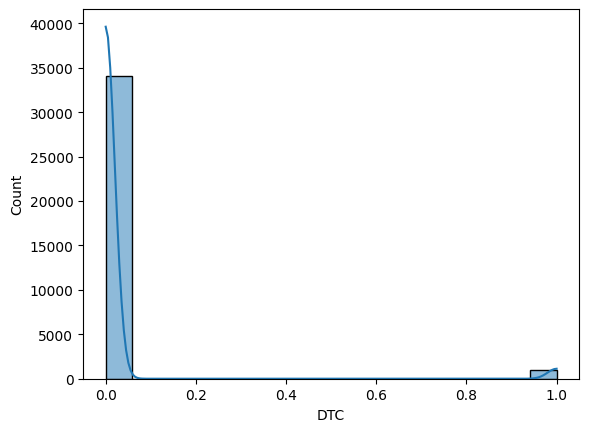

In [64]:
# Visualización del target antes del balanceo
sns.histplot(y_train, kde=True);

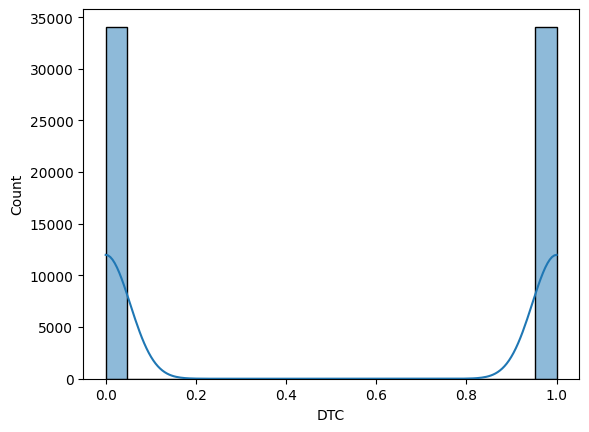

In [65]:
# Visualización del target después del balanceo
sns.histplot(y_train_bal, kde=True);

In [66]:
# Creamos una dataframe comparando el target antes y después del balanceo SMOTE para mejor visualización
df_comparando_dtc = pd.DataFrame({
    "DTC sin balanceo": y_train.value_counts(),
    "DTC con balanceo": y_train_bal.value_counts()
})
df_comparando_dtc

,DTC sin balanceo,DTC con balanceo
DTC,,
0,34075,34075
1,965,34075


In [67]:
# Guardamos la data transformada
df_transformado = {
    "X_train": X_train_bal,
    "y_train": y_train_bal,
    "X_test": X_test_scaled,
    "y_test": y_test
}

df_final = {
    "train": pd.concat([X_train_bal, y_train_bal], axis=1),
    "test": pd.concat([X_test_scaled, y_test], axis=1)
}

pd.to_pickle(df_transformado, f'{ubicacion_drive}/df_transformado.pickle')

# **Modeling**

In [7]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import StratifiedKFold, cross_validate

In [10]:
# Acceder a google drive
from google.colab import drive
drive.mount('/content/drive')

ubicacion_drive = '/content/drive/MyDrive/6672_Business Predictive Analytics_TF_Grupo 5/FuentesDatos'
#ubicacion_drive = '/content/drive/MyDrive/Trabajo Parcial Business/FuentesDatos'

df_modelo = pd.read_pickle(f'{ubicacion_drive}/df_transformado.pickle')

Mounted at /content/drive


## **Train Test Split**

In [70]:
X_train = df_modelo['X_train'] # Escalada + balanceo
y_train = df_modelo['y_train'] # Balanceo
X_test = df_modelo['X_test'] # Escalado y sin balanceo
y_test = df_modelo['y_test']

## **Cross Validation**

In [71]:
# Configurar y función de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

def validacion_cruzada(nombre_modelo, modelo, X_train, y_train):
  cv_res = cross_validate(
    modelo,
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
  )

  resumen = {
    'Modelo': nombre_modelo,
    'Accuracy (cv mean)':  cv_res['test_accuracy'].mean(),
    'Precision (cv mean)': cv_res['test_precision'].mean(),
    'Recall (cv mean)':    cv_res['test_recall'].mean(),
    'F1 (cv mean)':        cv_res['test_f1'].mean(),
    'AUC (cv mean)':       cv_res['test_roc_auc'].mean()
  }

  df_resumen = pd.DataFrame(resumen, index=[0])
  display(df_resumen)

## **Evaluation Models**

In [72]:
# Evaluación del modelo
def evaluar_modelo(nombre_modelo, modelo, X_test, y_test):
  y_pred  = modelo.predict(X_test)
  y_proba = modelo.predict_proba(X_test)[:, 1]

  acc  = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, zero_division=0)
  rec  = recall_score(y_test, y_pred, zero_division=0)
  f1   = f1_score(y_test, y_pred, zero_division=0)
  auc  = roc_auc_score(y_test, y_proba)

  resumen = {
    'Modelo': nombre_modelo,
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1': f1,
    'AUC': auc
  }
  df_resumen = pd.DataFrame(resumen, index=[0])
  display(df_resumen)

  # Matriz de confusión
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(5,4))
  sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicción: No Falla (0)', 'Predicción: Falla (1)'],
    yticklabels=['Real: No Falla (0)', 'Real: Falla (1)']
  )
  plt.title(f"Matriz de Confusión - {nombre_modelo}")
  plt.ylabel("Valor real")
  plt.xlabel("Predicción del modelo");

  return {
        "Modelo": nombre_modelo,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "AUC": auc,
        "y_proba": y_proba
    }

In [73]:
# Gráficar ROC
def graficar_roc(nombre_modelo, y_test, y_proba):
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  auc_val = roc_auc_score(y_test, y_proba)

  plt.figure(figsize=(6,5))
  plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {auc_val:.3f})')
  plt.plot([0,1], [0,1], 'k--')

  plt.title(f'Curva ROC - {nombre_modelo}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid(True);

## **Modelos**

### **Regresión Logística**

In [74]:
# Instanciar modelo de Regresión Logística
modelo_RegLog = LogisticRegression(
    random_state=42
)

In [75]:
# Validación Cruzada
validacion_cruzada("Regresión Logística", modelo_RegLog, X_train, y_train)

,Modelo,Accuracy (cv mean),Precision (cv mean),Recall (cv mean),F1 (cv mean),AUC (cv mean)
0,Regresión Logística,0.741805,0.696704,0.856493,0.768372,0.773507


In [76]:
# Entrenamiento del modelo
modelo_RegLog.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [77]:
# Predicciones
y_pred_reglog = modelo_RegLog.predict(X_test)
y_pred_proba_reglog = modelo_RegLog.predict_proba(X_test)

df_pred_reglog = pd.DataFrame({
    "Real (DTC)": y_test.values,
    "Predicción": y_pred_reglog,
    "Probabilidad de Falla": y_pred_proba_reglog[:, 1]
})

df_pred_reglog.head(10)

,Real (DTC),Predicción,Probabilidad de Falla
0,0,1,0.557541
1,0,1,0.543972
2,0,0,0.212472
3,0,1,0.728943
4,0,1,0.751183
5,0,0,0.084638
6,0,0,0.020156
7,0,0,0.419792
8,0,0,0.189993
9,0,0,0.053046


,Modelo,Accuracy,Precision,Recall,F1,AUC
0,Regresión Logística,0.63984,0.061145,0.842324,0.114013,0.768254


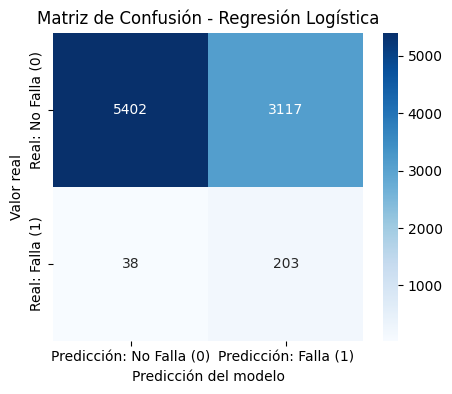

In [78]:
# Evaluar modelo
rgl_res = evaluar_modelo("Regresión Logística", modelo_RegLog, X_test, y_test)

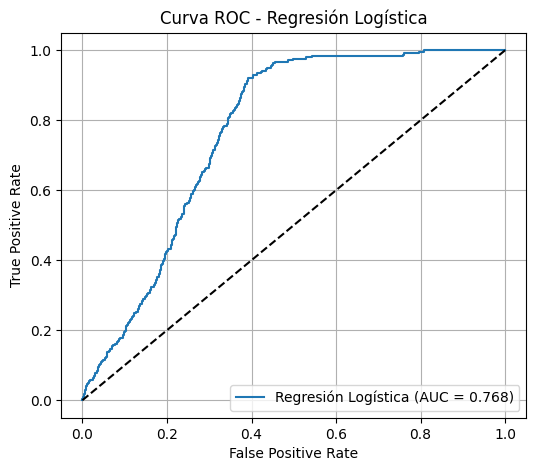

In [79]:
# Graficar ROC
probabilidades = modelo_RegLog.predict_proba(X_test)[:, 1]
graficar_roc("Regresión Logística", y_test, probabilidades)

### **Random Forest**

In [80]:
# Instanciar modelo de Random Forest
modelo_RandomForest = RandomForestClassifier(
    random_state=42,
)

In [81]:
# Validación Cruzada
validacion_cruzada("Random Forest", modelo_RandomForest, X_train, y_train)

,Modelo,Accuracy (cv mean),Precision (cv mean),Recall (cv mean),F1 (cv mean),AUC (cv mean)
0,Random Forest,0.996522,0.998,0.99504,0.996517,0.999916


In [82]:
# Entrenamiento del modelo
modelo_RandomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Predicciones
y_pred_random_forest = modelo_RandomForest.predict(X_test)
y_pred_proba_random_forest = modelo_RandomForest.predict_proba(X_test)[:, 1]

df_pred_random_forest = pd.DataFrame({
    "Real (DTC)": y_test.values,
    "Predicción": y_pred_random_forest,
    "Probabilidad de Falla": y_pred_proba_random_forest
})

df_pred_random_forest.head(10)

,Real (DTC),Predicción,Probabilidad de Falla
0,0,0,0.00
1,0,0,0.00
2,0,0,0.00
3,0,0,0.01
4,0,0,0.02
5,0,0,0.00
6,0,0,0.00
7,0,0,0.02
8,0,0,0.00
9,0,0,0.00


,Modelo,Accuracy,Precision,Recall,F1,AUC
0,Random Forest,0.997146,0.915385,0.987552,0.9501,0.997254


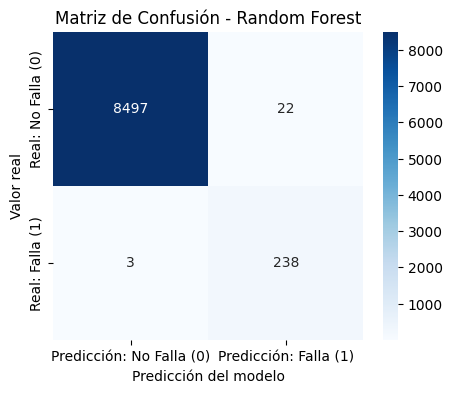

In [84]:
# Evaluar modelo
rfr_res = evaluar_modelo("Random Forest", modelo_RandomForest, X_test, y_test)

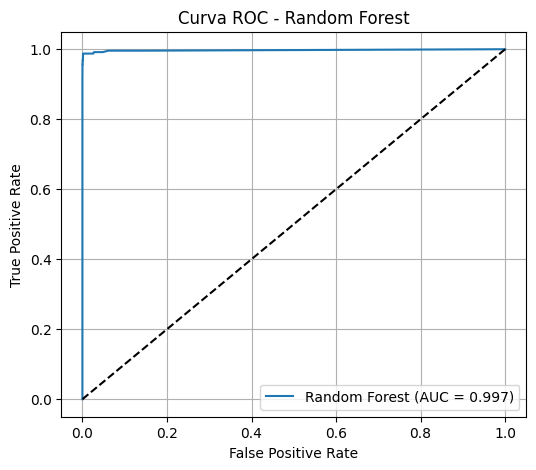

In [85]:
# Graficar ROC
probabilidades = modelo_RandomForest.predict_proba(X_test)[:, 1]
graficar_roc("Random Forest", y_test, probabilidades)

### **XGBoost**

In [86]:
# Instanciar modelo de XGBoost
modelo_XGBoost = XGBClassifier(
    random_state=42
)

In [87]:
# Validación Cruzada
validacion_cruzada("XGBoost", modelo_XGBoost, X_train, y_train)

,Modelo,Accuracy (cv mean),Precision (cv mean),Recall (cv mean),F1 (cv mean),AUC (cv mean)
0,XGBoost,0.997168,0.996979,0.997359,0.997169,0.999907


In [88]:
# Entrenamiento del modelo
modelo_XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [89]:
# Predicciones
y_pred_XGBoost = modelo_XGBoost.predict(X_test)
y_pred_proba_XGBoost = modelo_XGBoost.predict_proba(X_test)[:, 1]

df_pred_XGBoost = pd.DataFrame({
    "Real (DTC)": y_test.values,
    "Predicción": y_pred_XGBoost,
    "Probabilidad de Falla": y_pred_proba_XGBoost
})

df_pred_XGBoost.head(10)

,Real (DTC),Predicción,Probabilidad de Falla
0,0,0,0.003600
1,0,0,0.000003
2,0,0,0.000021
3,0,0,0.000431
4,0,1,0.887784
5,0,0,0.000100
6,0,0,0.000004
7,0,0,0.000038
8,0,0,0.000320
9,0,0,0.000015


,Modelo,Accuracy,Precision,Recall,F1,AUC
0,XGBoost,0.994406,0.877953,0.925311,0.90101,0.99345


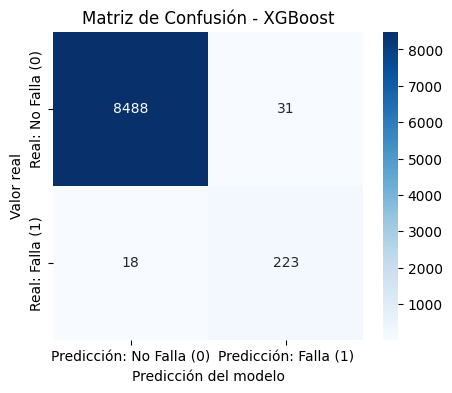

In [90]:
# Evaluar modelo
xgb_res = evaluar_modelo("XGBoost", modelo_XGBoost, X_test, y_test)

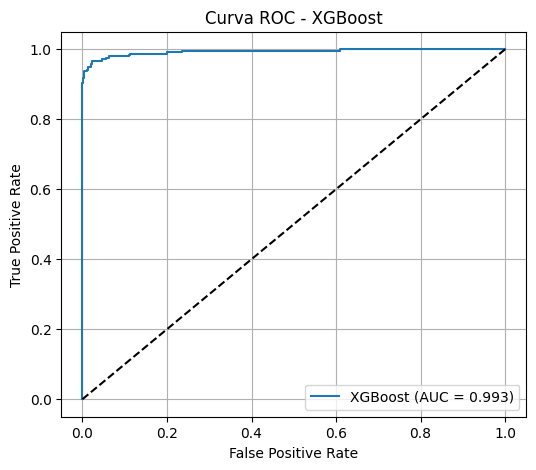

In [91]:
# Graficar ROC
probabilidades = modelo_XGBoost.predict_proba(X_test)[:, 1]
graficar_roc("XGBoost", y_test, probabilidades)

In [92]:
# Probabilidades de falla (clase 1) para cada modelo
y_proba_reglog = modelo_RegLog.predict_proba(X_test)[:, 1]
y_proba_rf     = modelo_RandomForest.predict_proba(X_test)[:, 1]
y_proba_xgb    = modelo_XGBoost.predict_proba(X_test)[:, 1]

In [93]:
# Diccionario maestro para recorrer todos los modelos
modelos_info = {
  "Regresión Logística": {
    "y_pred":  y_pred_reglog,
    "y_proba": y_proba_reglog
  },
  "Random Forest": {
    "y_pred":  y_pred_random_forest,
    "y_proba": y_proba_rf
  },
  "XGBoost": {
    "y_pred":  y_pred_XGBoost,
    "y_proba": y_proba_xgb
  }
}

filas_metricas = []
filas_roc = []
filas_cm = []

for nombre_modelo, datos in modelos_info.items():
  y_pred  = datos["y_pred"]
  y_proba = datos["y_proba"]

  acc  = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, zero_division=0)
  rec  = recall_score(y_test, y_pred, zero_division=0)
  f1   = f1_score(y_test, y_pred, zero_division=0)
  auc  = roc_auc_score(y_test, y_proba)

  filas_metricas.append({
    "Modelo": nombre_modelo,
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1": f1,
    "AUC": auc
  })

  fpr, tpr, thresholds = roc_curve(y_test, y_proba)

  for fp, tp, thr in zip(fpr, tpr, thresholds):
    filas_roc.append({
      "Modelo": nombre_modelo,
      "FPR": fp,
      "TPR": tp,
      "Threshold": thr
    })

  cm = confusion_matrix(y_test, y_pred)
  for real in [0, 1]:
    for pred in [0, 1]:
      filas_cm.append({
        "Modelo": nombre_modelo,
        "Clase_real": real,
        "Clase_predicha": pred,
        "Conteo": int(cm[real, pred])
      })

# DataFrames finales
df_metricas_modelos = pd.DataFrame(filas_metricas)
df_roc_modelos = pd.DataFrame(filas_roc)
df_cm_modelos = pd.DataFrame(filas_cm)

# Exportar a CSV para Power BI
df_metricas_modelos.to_csv(f'{ubicacion_drive}/modelos_metricas.csv', index=False)
df_roc_modelos.to_csv(f'{ubicacion_drive}/modelos_curvas_roc.csv', index=False)
df_cm_modelos.to_csv(f'{ubicacion_drive}/modelos_matrices_confusion.csv', index=False)

# **Optimization**

In [94]:
# Importar algoritmo
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

,Modelo,Accuracy,Precision,Recall,F1,AUC
0,XGBoost - Base,0.994406,0.877953,0.925311,0.90101,0.99345


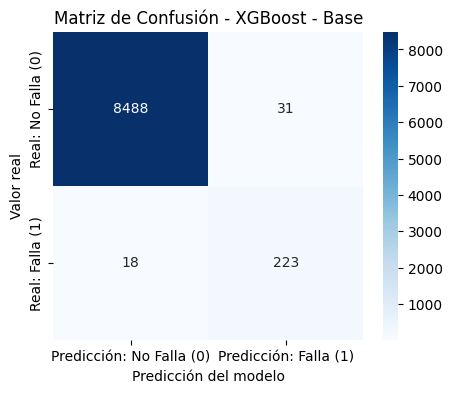

In [95]:
# Instanciar modelo base de XGBoost
xgb_base = XGBClassifier(
  random_state=42
)

# Entrenamiento del modelo
xgb_base.fit(X_train, y_train)

# Evaluación del modelo
res_base = evaluar_modelo("XGBoost - Base", xgb_base, X_test, y_test)

## **GridSearchCV**


=== Ejecutando GridSearchCV ===
Fitting 3 folds for each of 64 candidates, totalling 192 fits

=== Mejores hiperparámetros (GridSearchCV): ===
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}

Mejor AUC (cv): 0.9999



,Modelo,Accuracy,Precision,Recall,F1,AUC
0,XGBoost - GridSearchCV,0.99395,0.864341,0.925311,0.893788,0.993984


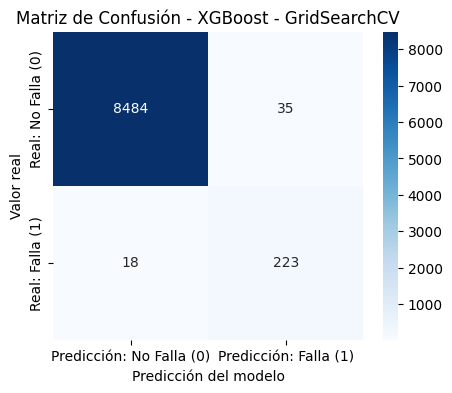

In [96]:
param_grid_gs = {
  'max_depth':        [4, 6],
  'learning_rate':    [0.05, 0.1],
  'n_estimators':     [200, 300],
  'subsample':        [0.8],
  'colsample_bytree': [0.8, 1.0],
  'gamma':            [0, 1],
  'min_child_weight': [1, 5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
  estimator=xgb_base,
  param_grid=param_grid_gs,
  scoring='roc_auc',
  cv=cv,
  n_jobs=-1,
  verbose=1
)

print('\n=== Ejecutando GridSearchCV ===')
grid_search.fit(X_train, y_train)

print('\n=== Mejores hiperparámetros (GridSearchCV): ===')
print(grid_search.best_params_)
print(f'\nMejor AUC (cv): {grid_search.best_score_:.4f}\n')

xgb_gs = grid_search.best_estimator_
res_gs = evaluar_modelo('XGBoost - GridSearchCV', xgb_gs, X_test, y_test)

## **RandomSearchCV**


=== Ejecutando RandomizedSearchCV ===
Fitting 3 folds for each of 30 candidates, totalling 90 fits

=== Mejores hiperparámetros (RandomizedSearchCV) ===
{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.6}

Mejor AUC (cv): 0.9999



,Modelo,Accuracy,Precision,Recall,F1,AUC
0,XGBoost - RandomizedSearchCV,0.994406,0.877953,0.925311,0.90101,0.994746


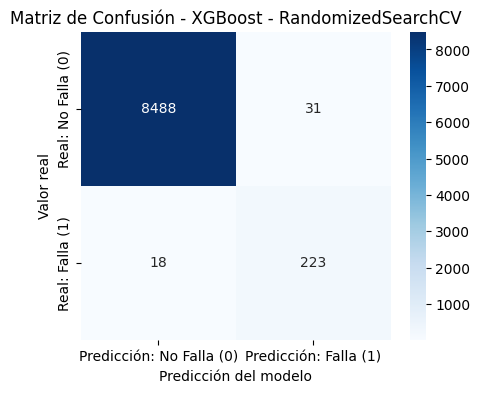

In [97]:
param_dist_rs = {
  'max_depth':        [3, 4, 5, 6, 8, 10],
  'learning_rate':    [0.005, 0.01, 0.03, 0.05, 0.1],
  'n_estimators':     [150, 200, 250, 300, 400, 500],
  'subsample':        [0.6, 0.7, 0.8, 0.9, 1.0],
  'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
  'gamma':            [0, 0.5, 1, 2, 5, 10],
  'min_child_weight': [1, 3, 5, 7]
}

random_search = RandomizedSearchCV(
  estimator=xgb_base,
  param_distributions=param_dist_rs,
  n_iter=30,
  scoring='roc_auc',
  cv=cv,
  n_jobs=-1,
  verbose=1,
  random_state=42
)

print('\n=== Ejecutando RandomizedSearchCV ===')
random_search.fit(X_train, y_train)

print('\n=== Mejores hiperparámetros (RandomizedSearchCV) ===')
print(random_search.best_params_)
print(f'\nMejor AUC (cv): {random_search.best_score_:.4f}\n')

xgb_rs = random_search.best_estimator_
res_rs = evaluar_modelo('XGBoost - RandomizedSearchCV', xgb_rs, X_test, y_test)


## **Comparativa**

In [98]:
# Comparativa de los resultado de métricas
resultados = []

for res in [res_base, res_gs, res_rs]:
    resultados.append({
        "Modelo":  res["Modelo"],
        "Accuracy": res["Accuracy"],
        "Precision": res["Precision"],
        "Recall": res["Recall"],
        "F1": res["F1"],
        "AUC": res["AUC"]
    })

df_resultados = pd.DataFrame(resultados)
print("\nComparación de modelos XGBoost (Base vs GridSearch vs Randomized):")
display(df_resultados.sort_values("AUC", ascending=False))



Comparación de modelos XGBoost (Base vs GridSearch vs Randomized):


,Modelo,Accuracy,Precision,Recall,F1,AUC
2,XGBoost - RandomizedSearchCV,0.994406,0.877953,0.925311,0.901010,0.994746
1,XGBoost - GridSearchCV,0.993950,0.864341,0.925311,0.893788,0.993984
0,XGBoost - Base,0.994406,0.877953,0.925311,0.901010,0.993450


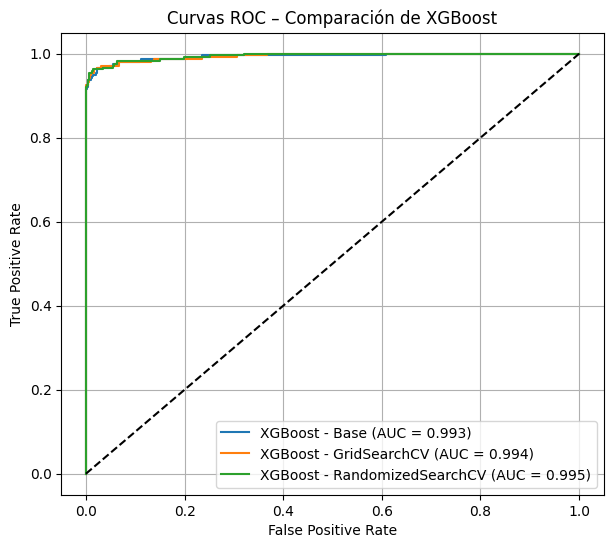

In [99]:
# Comparativa con curvas de ROC
plt.figure(figsize=(7, 6))

for res, color in zip(
    [res_base, res_gs, res_rs],
    ['C0', 'C1', 'C2']
):
    fpr, tpr, _ = roc_curve(y_test, res["y_proba"])
    plt.plot(fpr, tpr, label=f"{res['Modelo']} (AUC = {res['AUC']:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC – Comparación de XGBoost")
plt.legend()
plt.grid(True);

In [12]:
# Datos de Prueba para test
# Cargar df_eda
df_eda = pd.read_pickle(f'{ubicacion_drive}/df_eda.pickle')

# Reconstruimos el test set sin escalar:
X = df_eda.drop(columns='DTC')
y = df_eda['DTC']

# Importar librerías
from sklearn.model_selection import train_test_split
_, X_test_raw, _, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cargar df_transformado
df_modelo = pd.read_pickle(f'{ubicacion_drive}/df_transformado.pickle')

# Separar los datos de prueba
X_test_original = df_modelo['X_test']
y_test_original = df_modelo['y_test']

# Seleccionar casos reales de fallo y no fallo
casos_falla = X_test_raw[y_test_raw == 1].sample(3, random_state=42)
casos_no_falla = X_test_raw[y_test_raw == 0].sample(3, random_state=42)

# Unimos ambos
X_test_custom = pd.concat([casos_falla, casos_no_falla], ignore_index=True)

# Agregar target real
y_real = pd.concat([
    y_test_raw[y_test_raw == 1].sample(3, random_state=42),
    y_test_raw[y_test_raw == 0].sample(3, random_state=42)
], ignore_index=True)

# Escalar con el mismo scaler
X_test_custom_scaled = scaler.transform(X_test_custom)
X_test_custom_scaled = pd.DataFrame(X_test_custom_scaled, columns=X_test_custom.columns)

# Predecir
proba = xgb_rs.predict_proba(X_test_custom_scaled)[:, 1]
pred = xgb_rs.predict(X_test_custom_scaled)

# Mostrar resultados
df_resultados = X_test_custom.copy()
df_resultados["DTC_real"] = y_real.values
df_resultados["Prob_falla"] = proba
df_resultados["Predicción"] = pred
df_resultados["Nivel_riesgo"] = df_resultados["Prob_falla"].apply(
    lambda p: "Alto" if p >= 0.7 else ("Medio" if p >= 0.3 else "Bajo")
)

print("\n=== Resultados reales del dataset (sin NaN) ===")
display(df_resultados)


NameError: name 'scaler' is not defined

In [ ]:
# Importar modelo de ML
import pickle
archivo = f'{ubicacion_drive}/modelo_final_xgboost.sav'
pickle.dump(xgb_rs, open(archivo, 'wb'))